In [1]:
!pip3 install -U ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# check which datasets can be imported
# list_available_datasets()

In [5]:
diabetes = fetch_ucirepo(id=296)
print(f'Diabetes Data Fetched!')

Diabetes Data Fetched!


C:\Users\Happy\anaconda3\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [4]:
# heart_disease = fetch_ucirepo(id=45)
# heart_disease.data.features

In [ ]:
diabetes.data.features

In [8]:
df = diabetes.data.original.copy()
# df.head()
# print(f'Data size is {df.shape}')

In [ ]:
df.nunique()

In [ ]:
df.describe()

In [26]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# 0) Data Processing

In [9]:
# Replace missing values in Dataset with values that make sense
na_cols = ['race', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']
replace_cols = ['Other', 'Other', 'Other', 'Other', 'No Diagnosis 2', 'No Diagnosis 3', 'None', 'None']

for i in range(len(na_cols)):
    df.fillna({na_cols[i]: replace_cols[i]}, inplace = True)
# df.isnull().sum()

# Replace values with bad formatting for better understanding
df.replace({'change': {'Ch': 'Yes'}}, inplace=True)
df.replace({'readmitted': {'NO': 'No'}}, inplace=True)

# 1) Bivariate Analysis

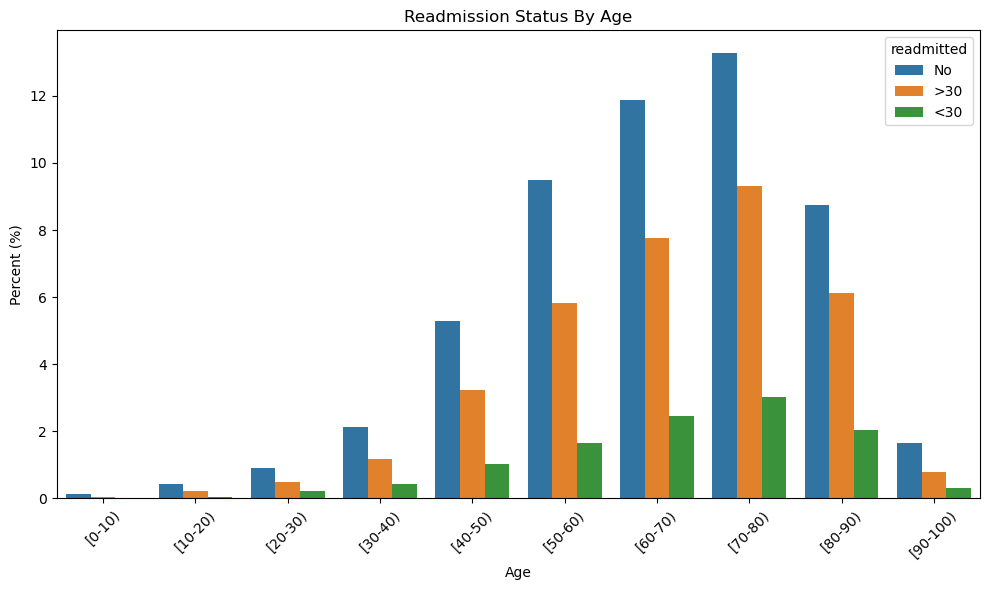

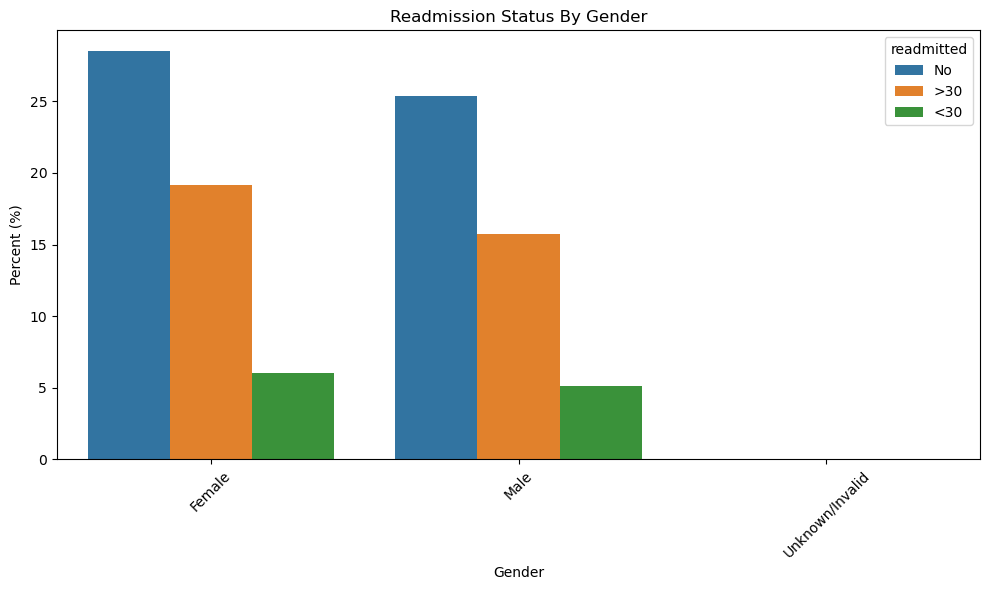

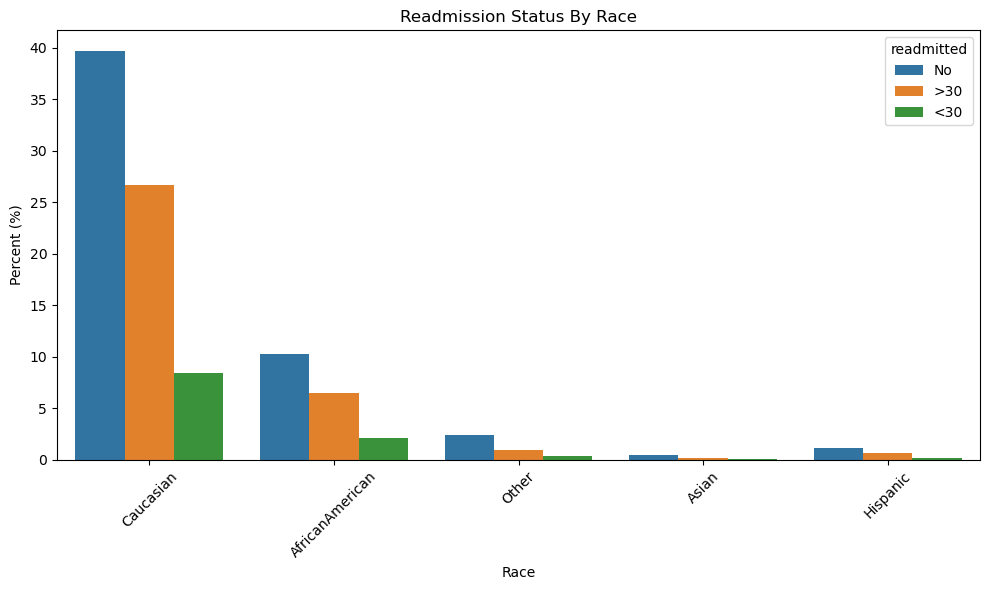

In [10]:
demographics_cols = ['age', 'gender', 'race']
demographics_labels = ['Age', 'Gender', 'Race']

for i in range(len(demographics_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=demographics_cols[i], hue='readmitted', stat="percent")
    plt.xlabel(demographics_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {demographics_labels[i]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

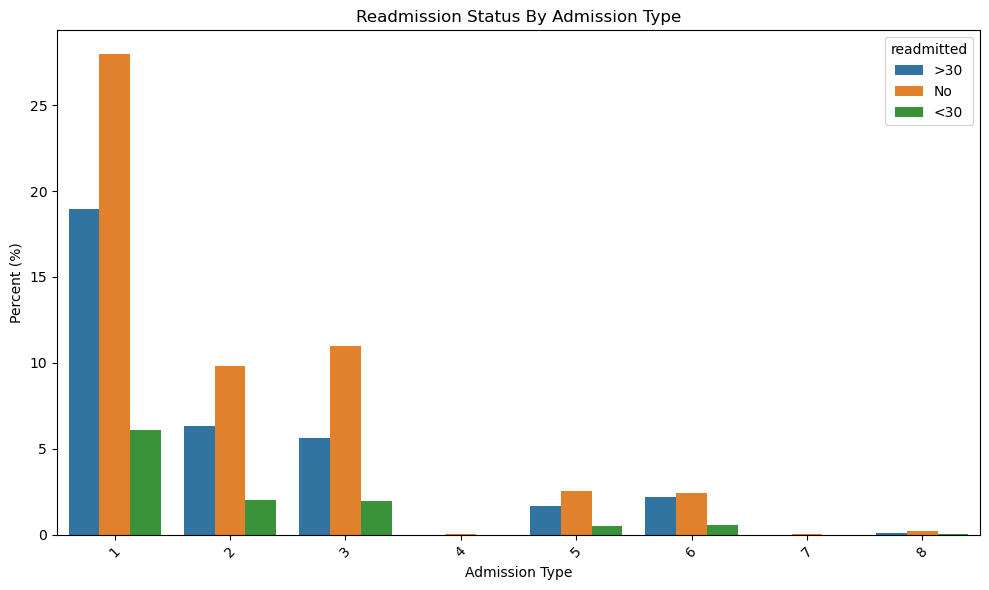

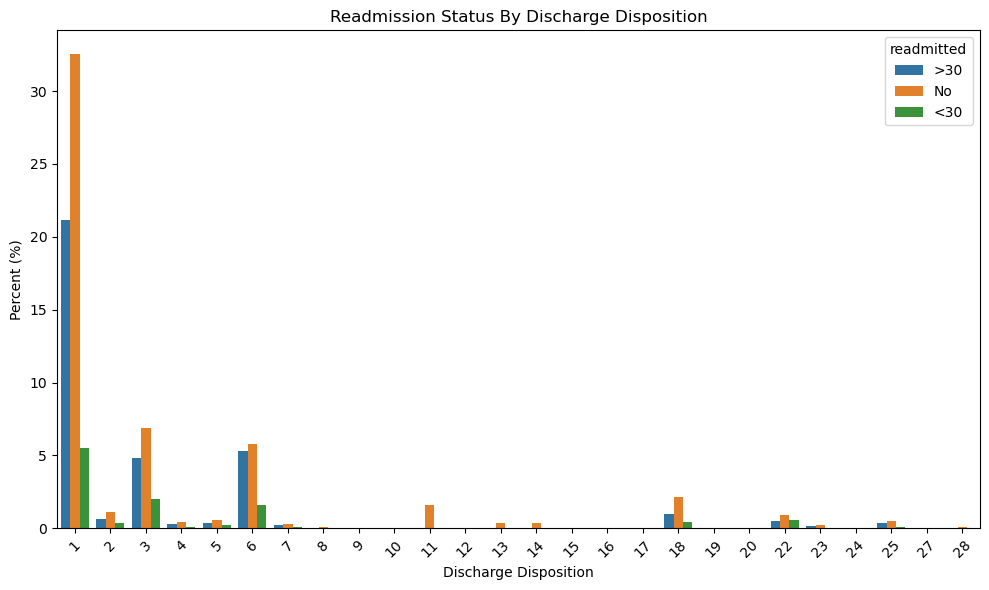

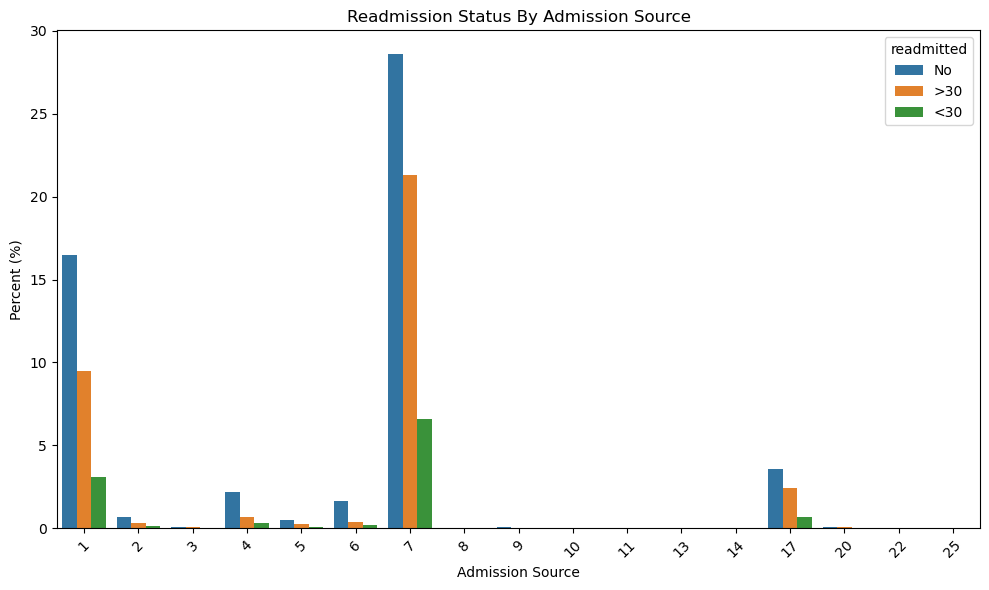

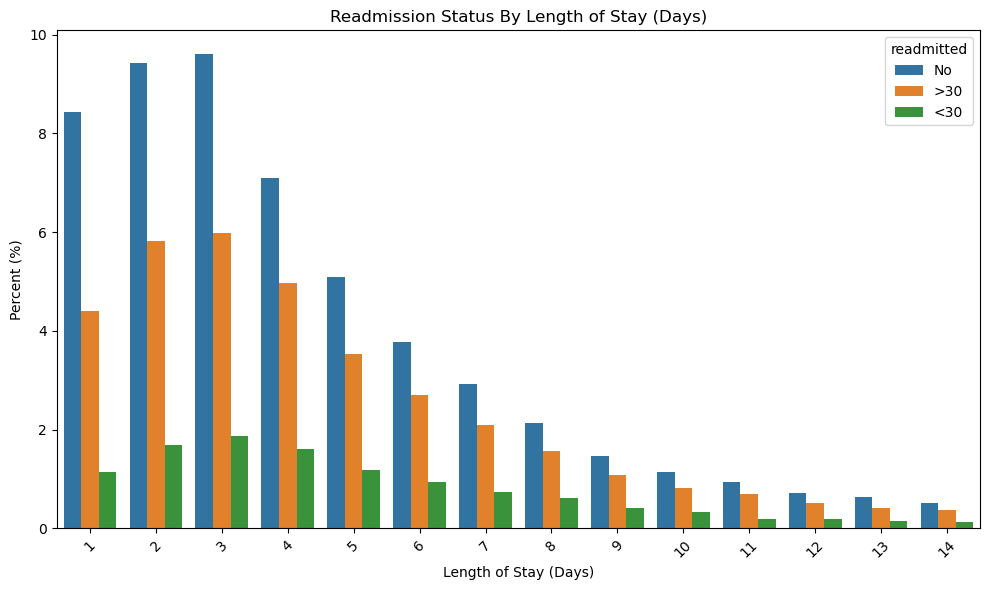

In [11]:
admission_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital']
admission_labels = ['Admission Type', 'Discharge Disposition', 'Admission Source', 'Length of Stay (Days)']

for i in range(len(admission_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=admission_cols[i], hue='readmitted', stat="percent")
    plt.xlabel(admission_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {admission_labels[i]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

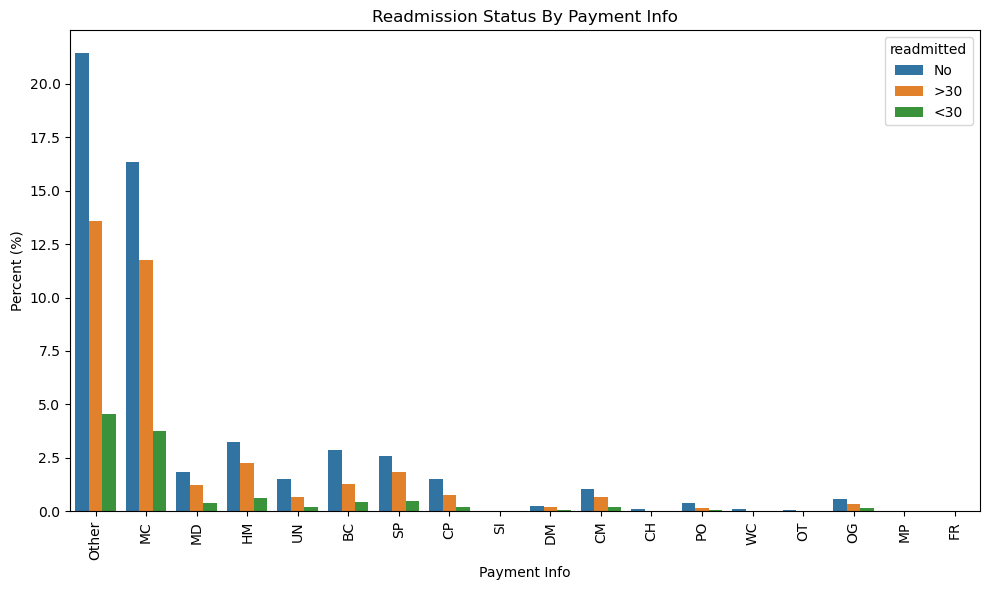

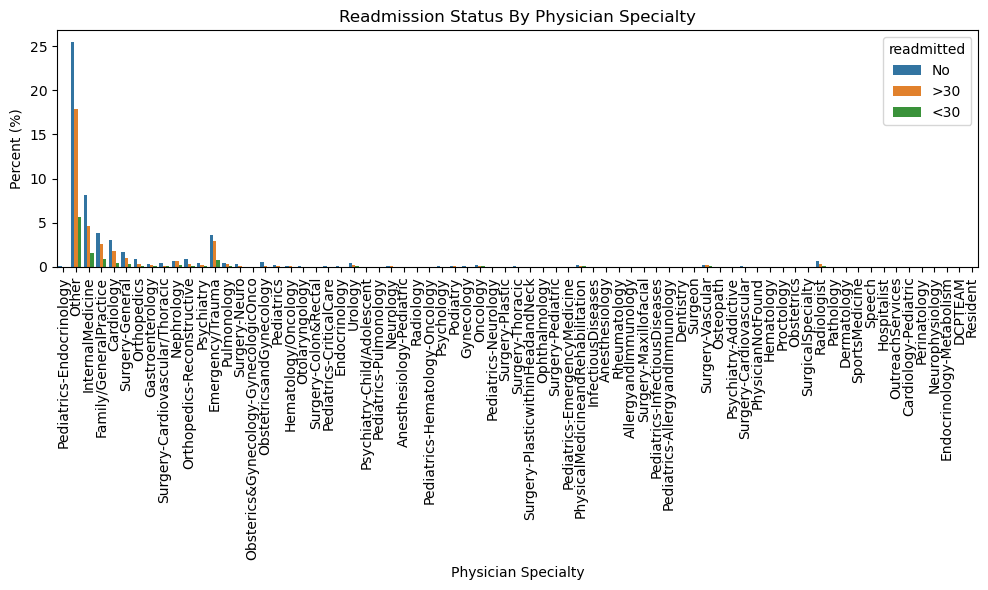

In [13]:
provider_cols = ['payer_code', 'medical_specialty']
provider_labels = ['Payment Info', 'Physician Specialty']

for i in range(len(provider_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=provider_cols[i], hue='readmitted', stat="percent")
    plt.xlabel(provider_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {provider_labels[i]}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

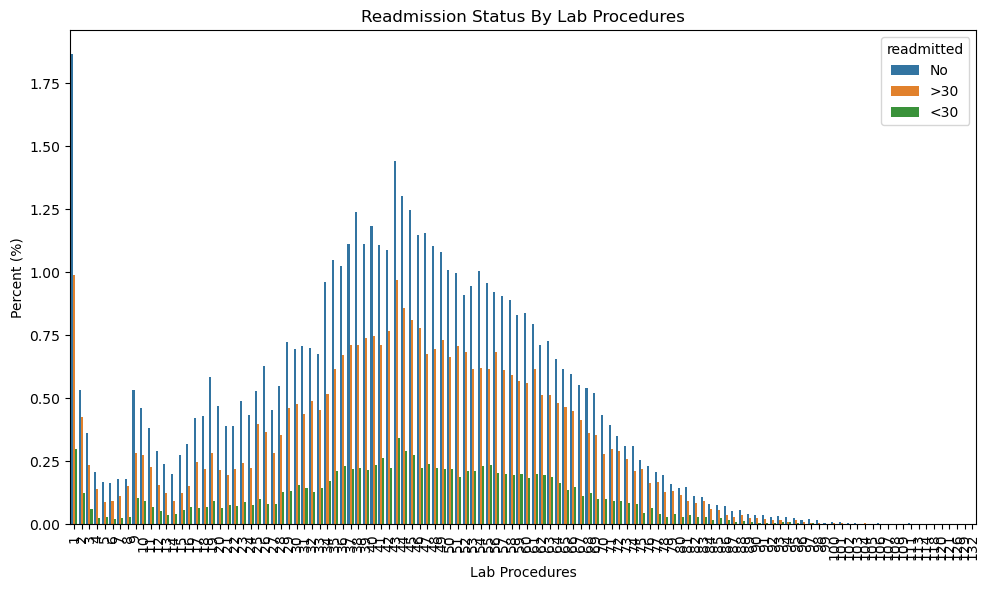

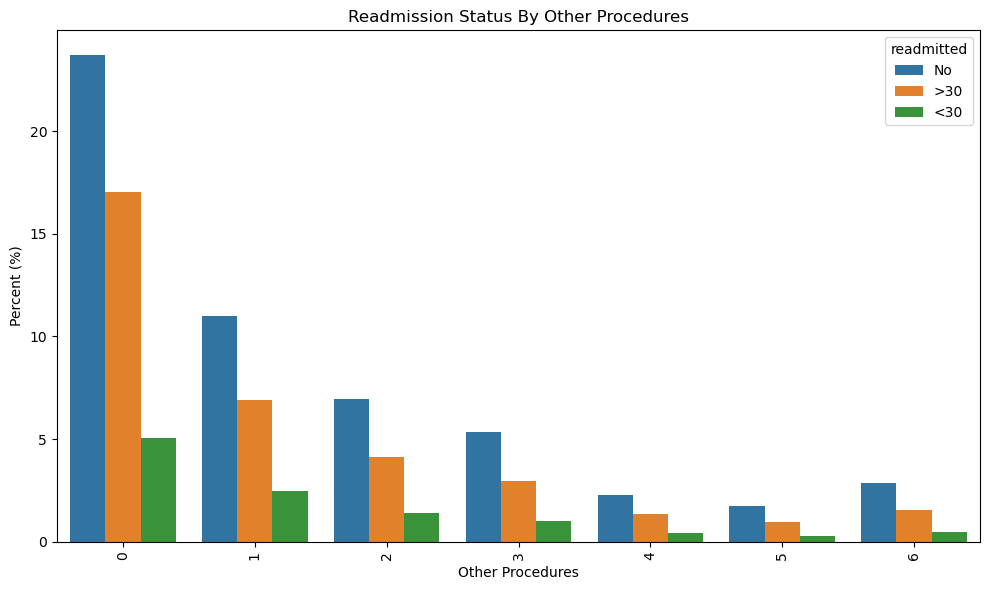

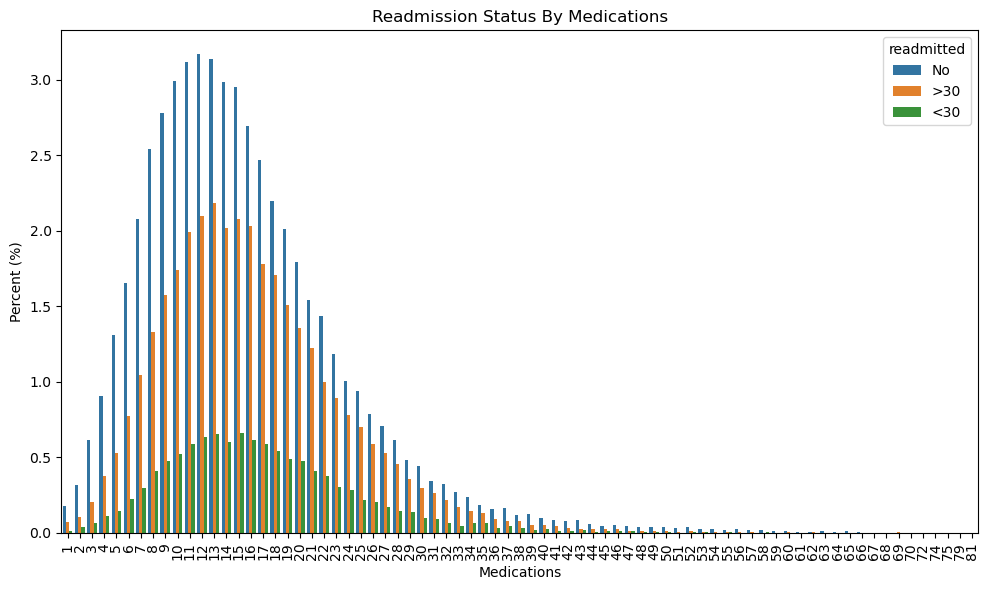

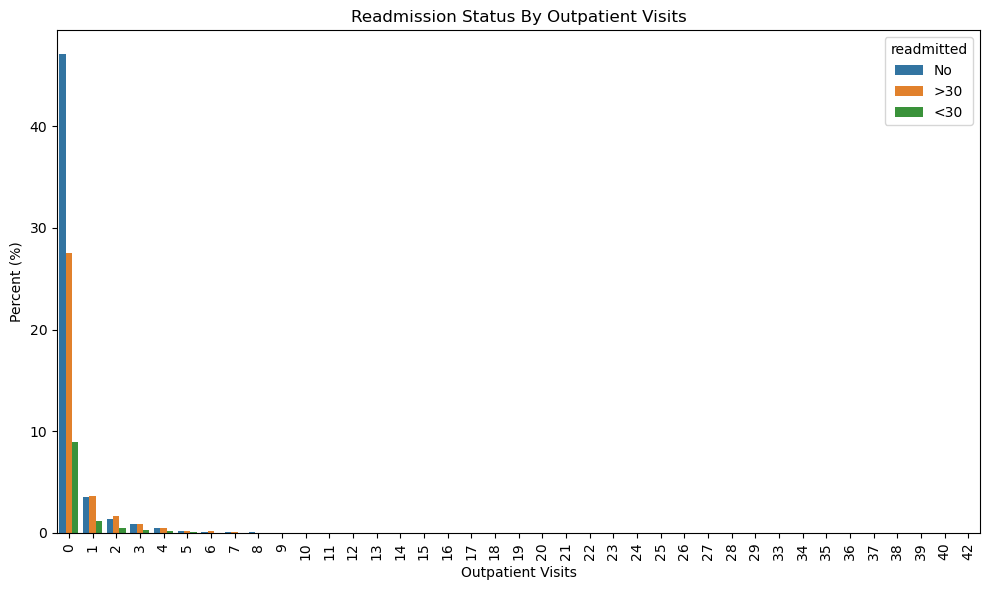

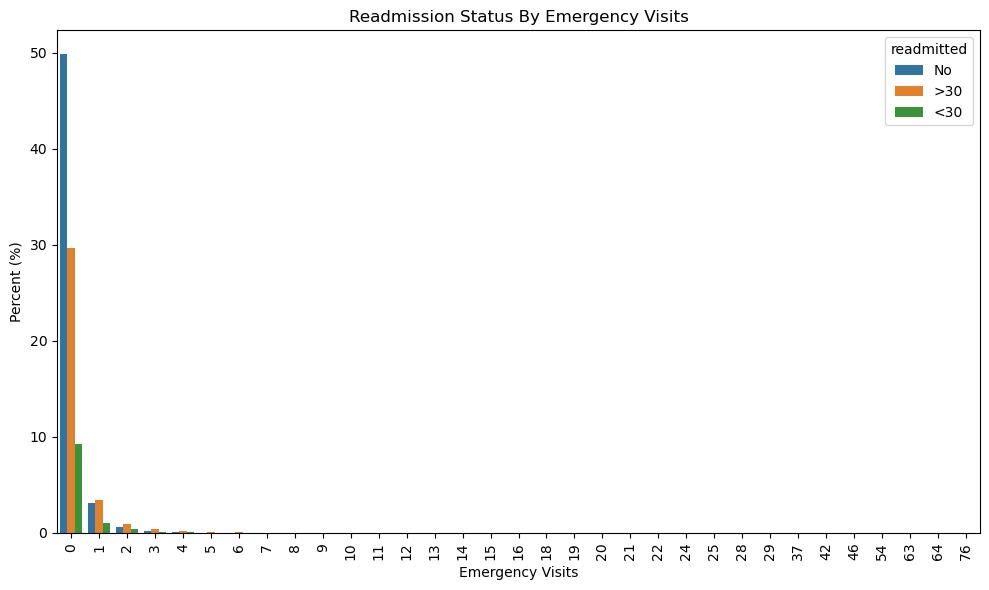

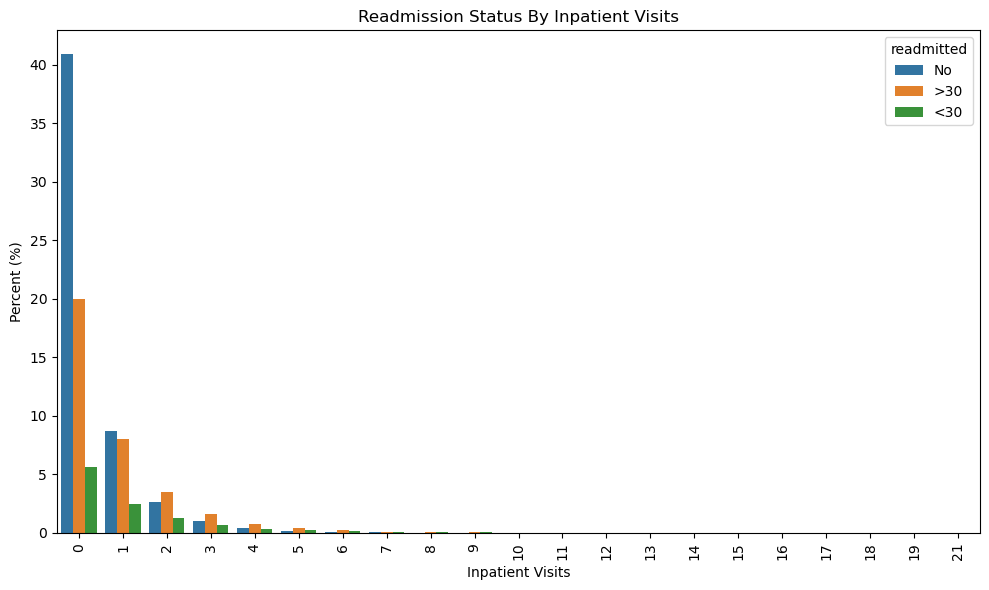

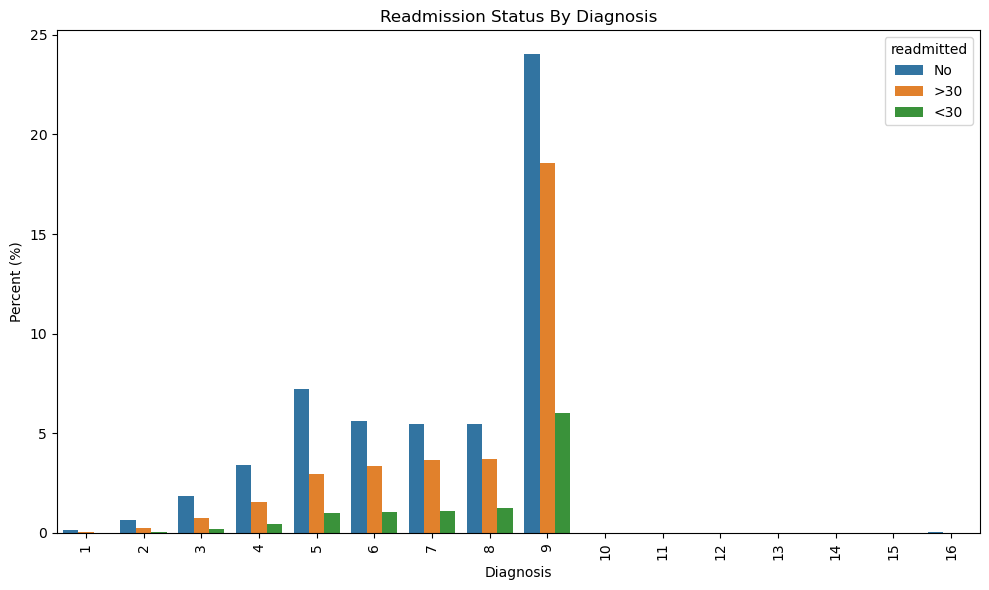

In [12]:
clinicalmetrics_cols = ['num_lab_procedures', 'num_procedures', 'num_medications',
                       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
clinicalmetrics_labels = ['Lab Procedures', 'Other Procedures', 'Medications',
                         'Outpatient Visits', 'Emergency Visits', 'Inpatient Visits', 'Diagnosis']

for i in range(len(clinicalmetrics_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=clinicalmetrics_cols[i], hue='readmitted', stat="percent")
    plt.xlabel(clinicalmetrics_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {clinicalmetrics_labels[i]}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

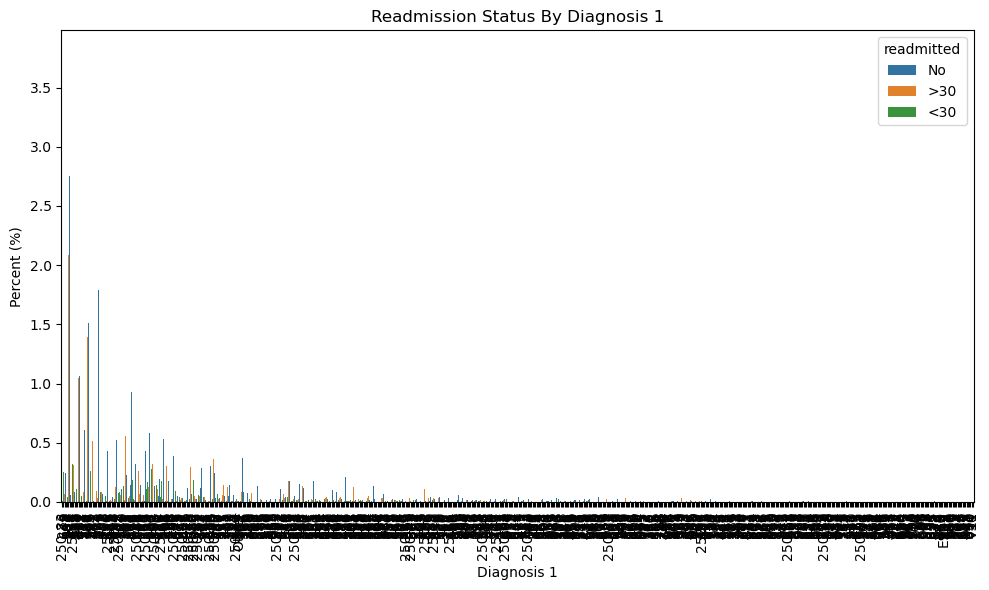

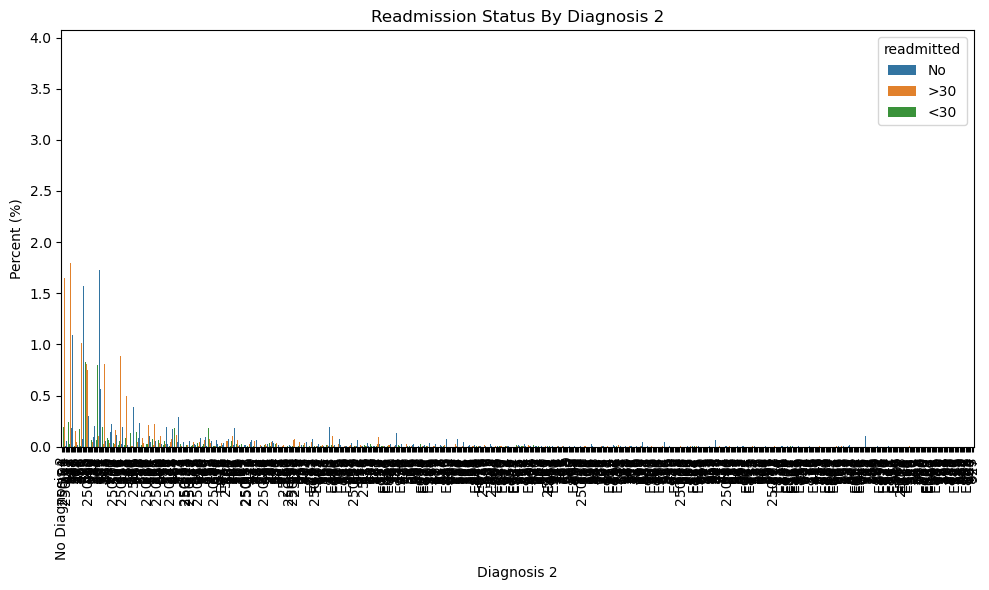

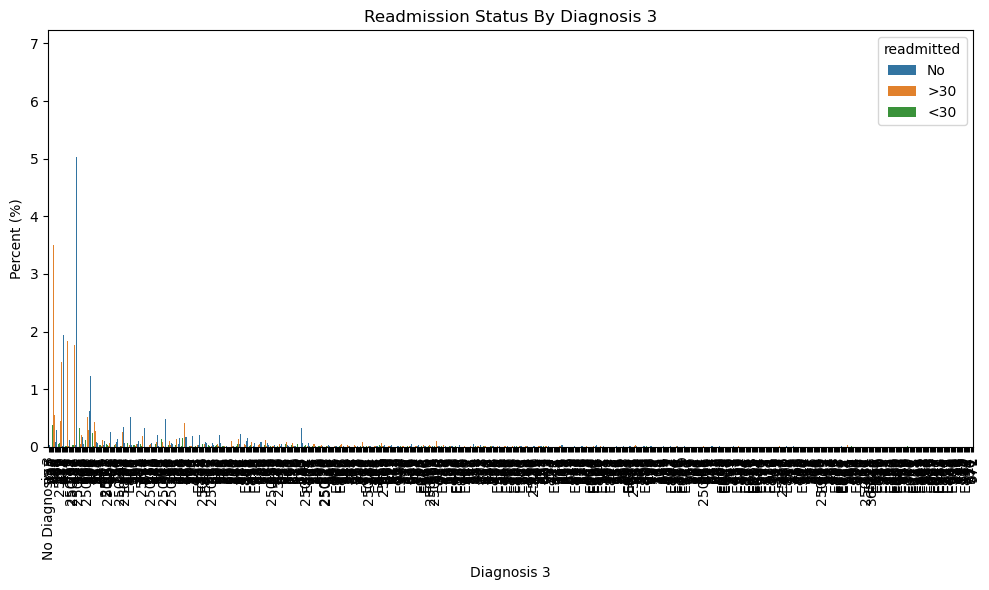

In [14]:
diagnosis_cols = ['diag_1', 'diag_2', 'diag_3']
diagnosis_labels = ['Diagnosis 1', 'Diagnosis 2', 'Diagnosis 3']

for i in range(len(diagnosis_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=diagnosis_cols[i], hue='readmitted', stat="percent")
    plt.xlabel(diagnosis_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {diagnosis_labels[i]}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
# Maybe can figure out which diagnosis relates more to diabetes and ONLY plot those instead

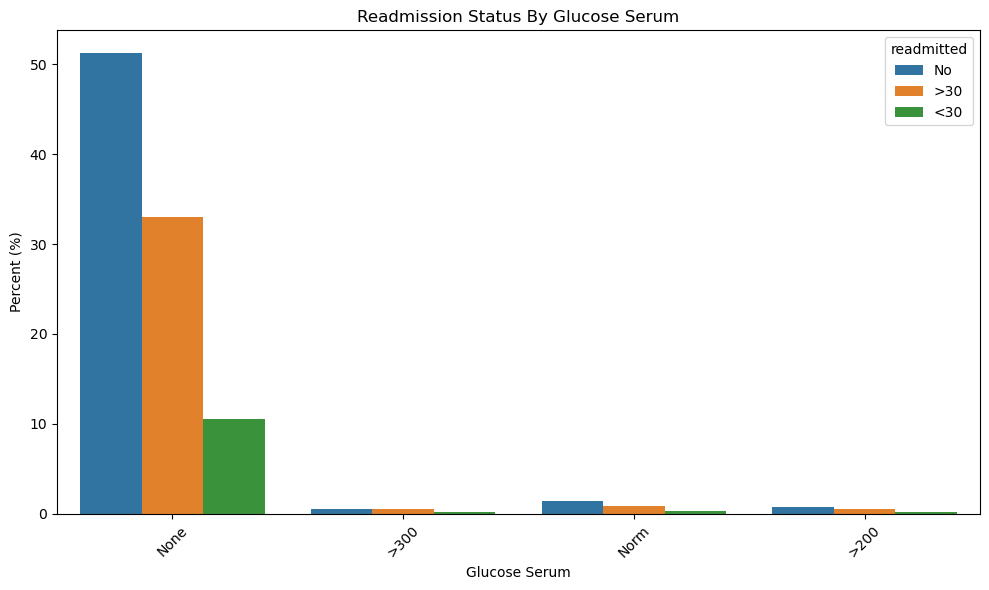

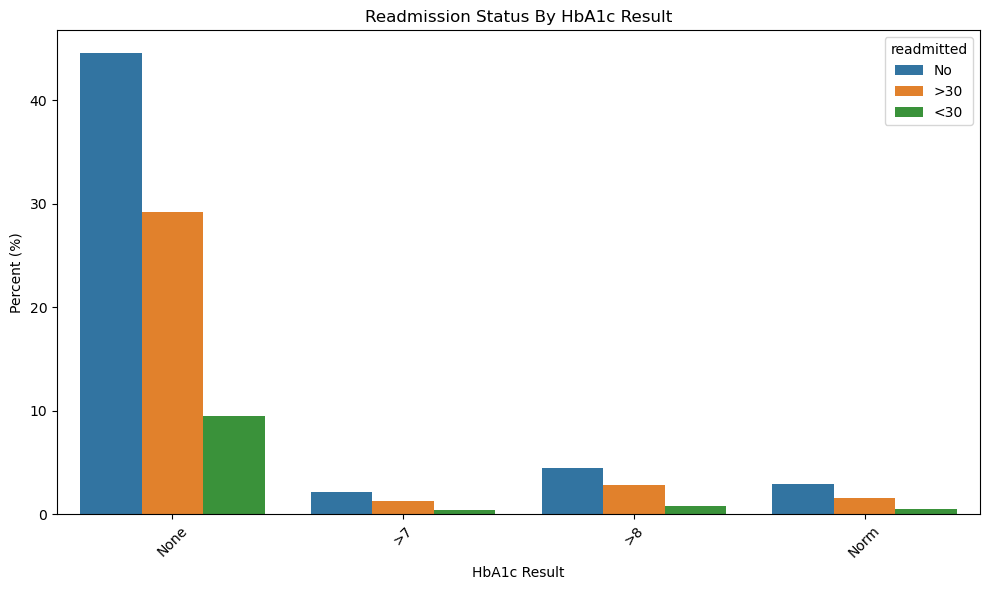

In [15]:
lab_cols = ['max_glu_serum', 'A1Cresult']
lab_labels = ['Glucose Serum', 'HbA1c Result']

for i in range(len(lab_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=lab_cols[i], hue='readmitted', stat="percent")
    plt.xlabel(lab_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {lab_labels[i]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

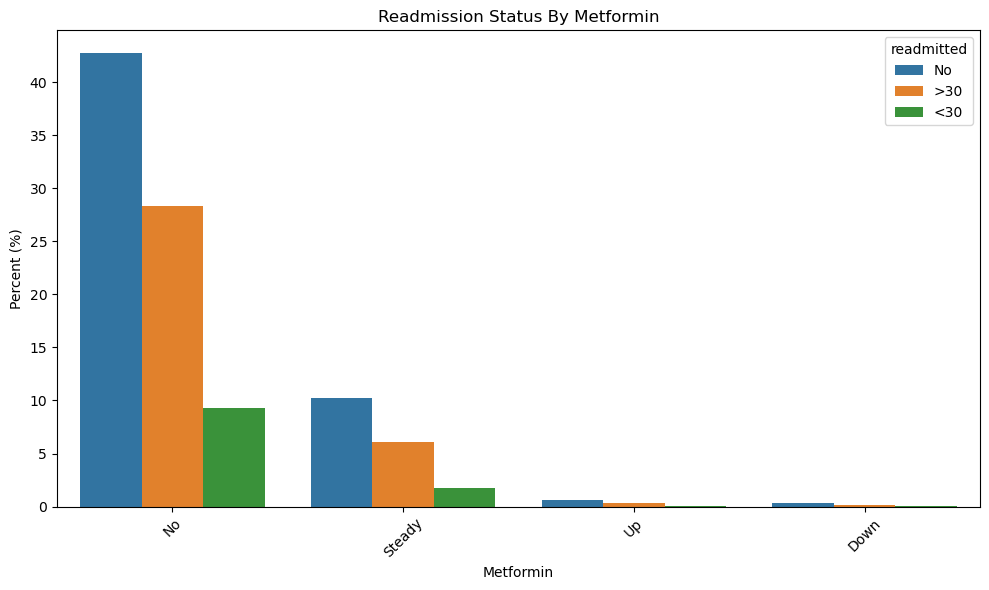

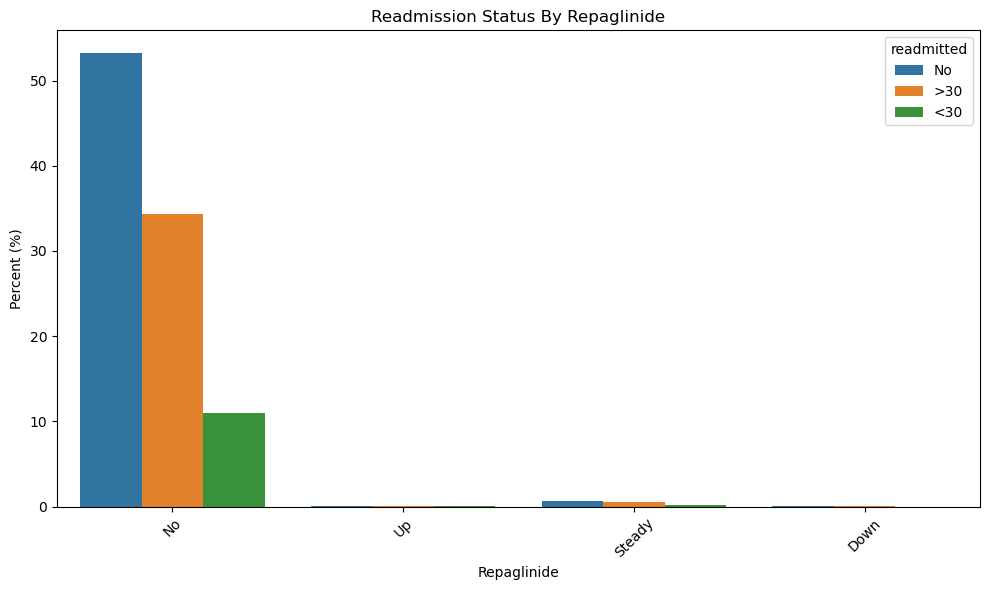

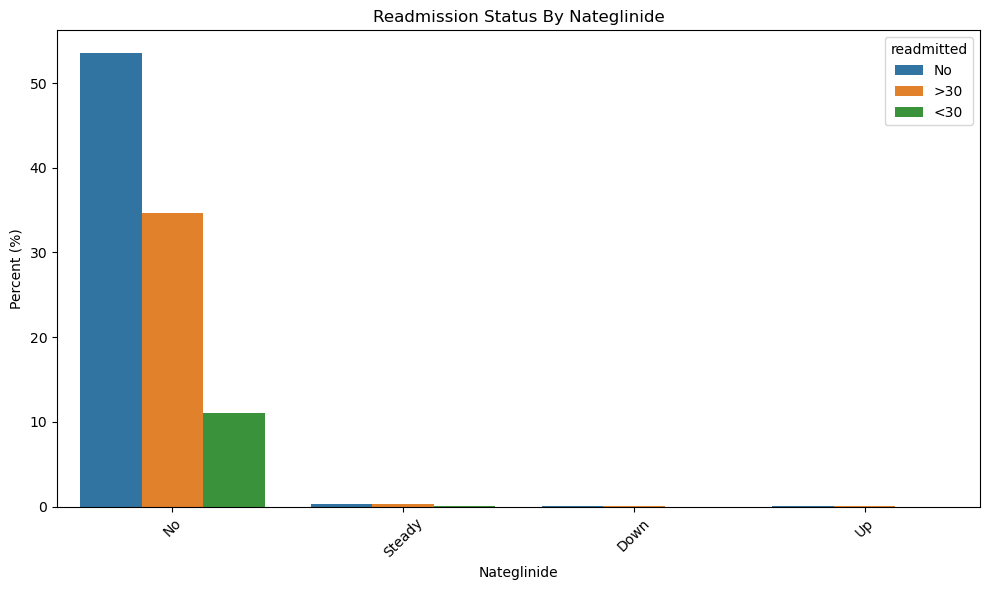

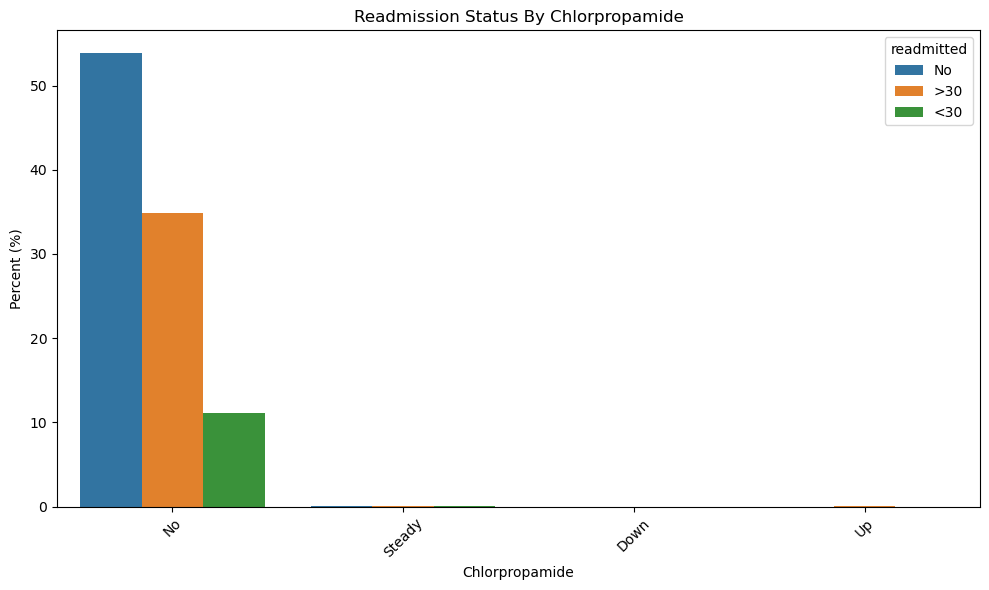

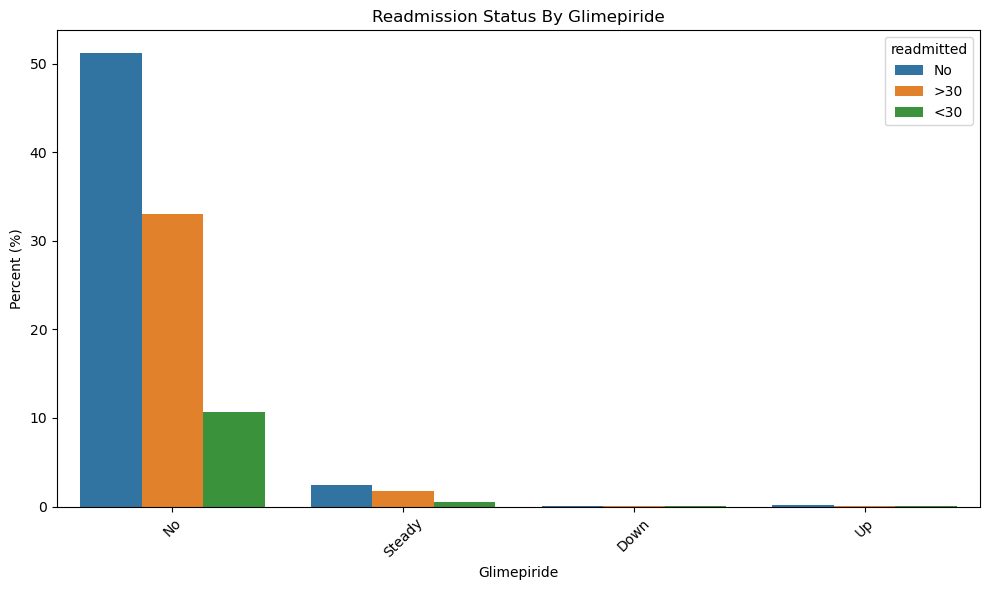

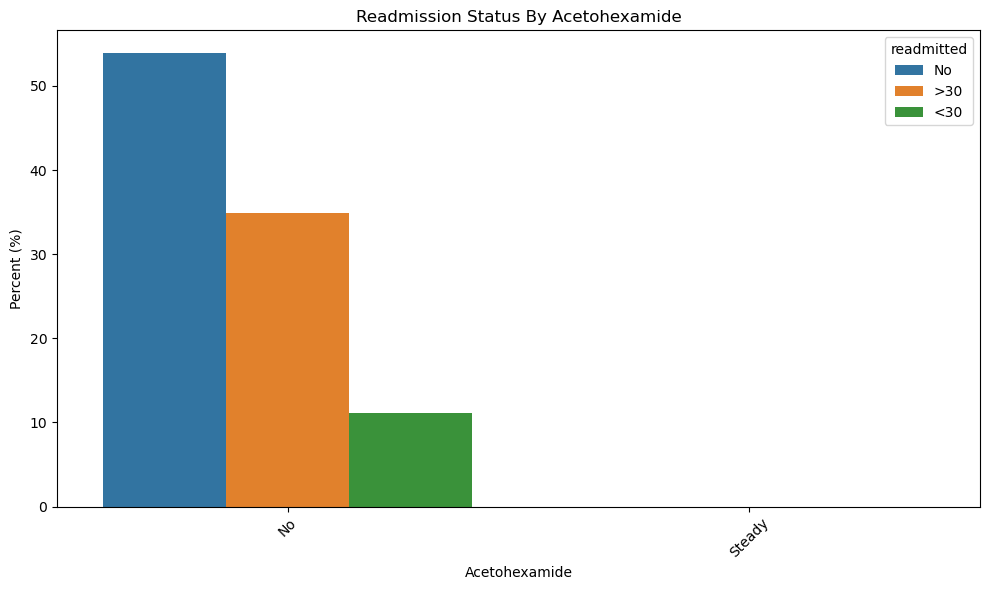

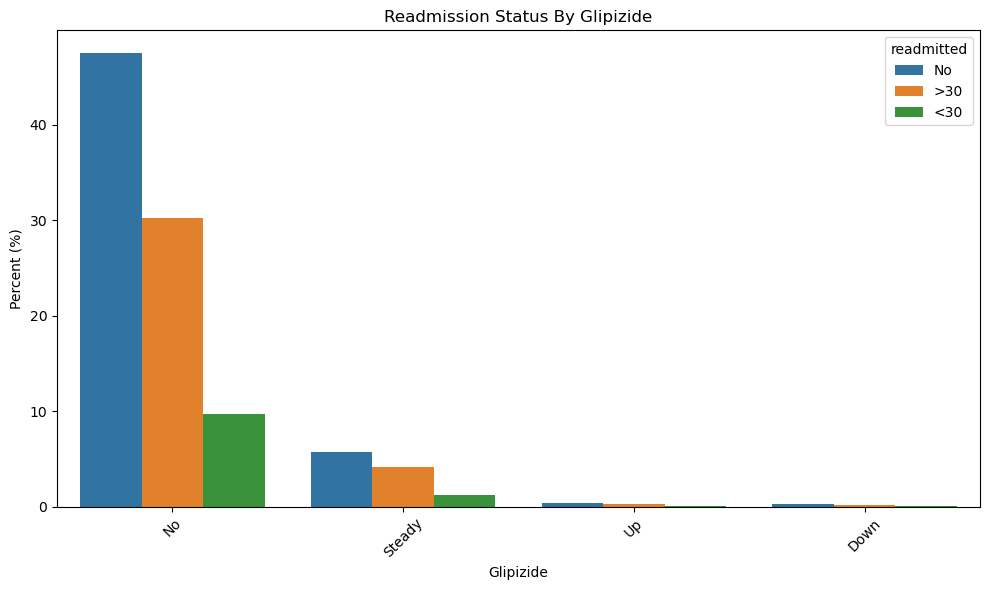

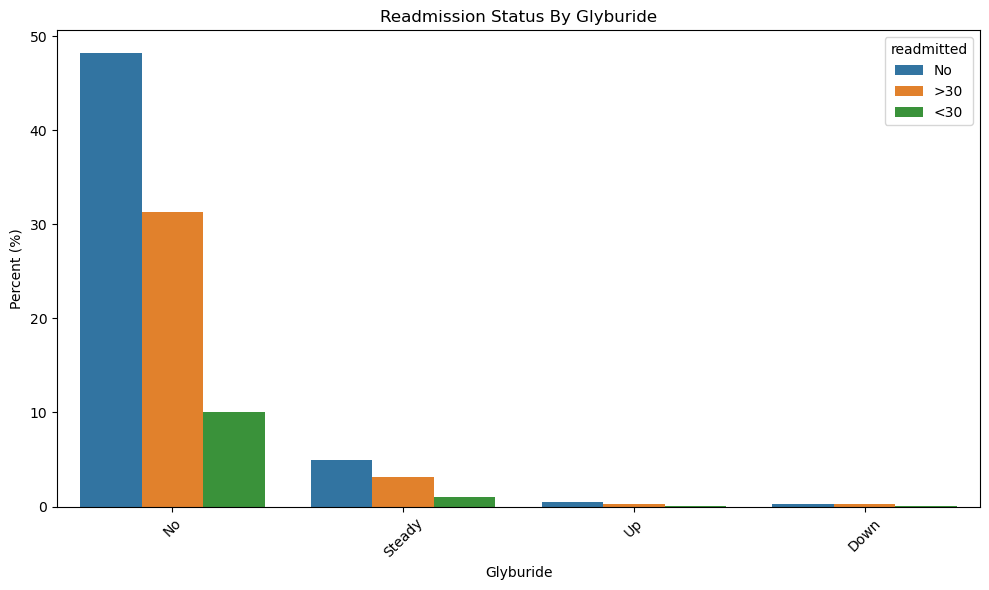

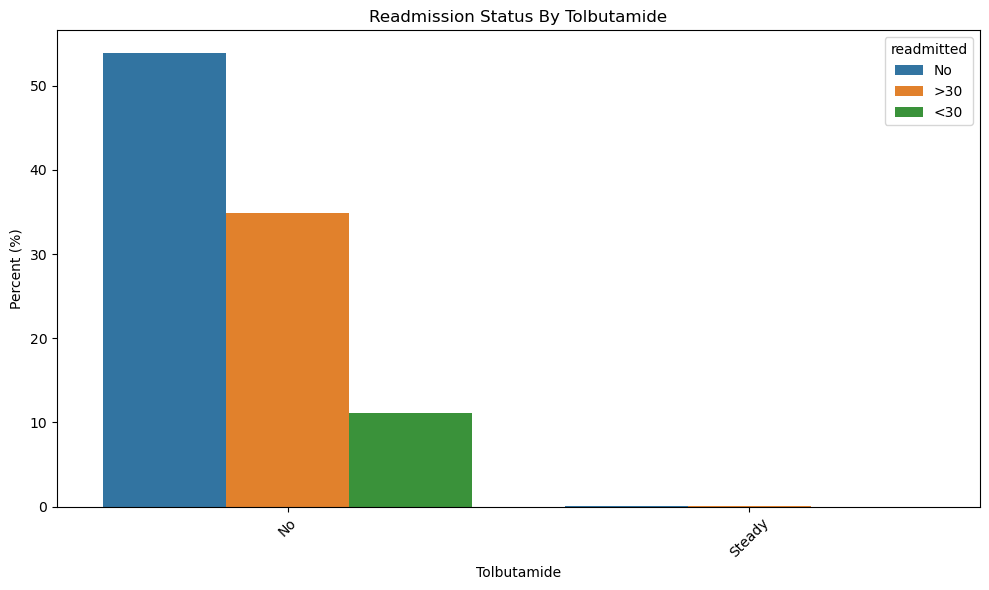

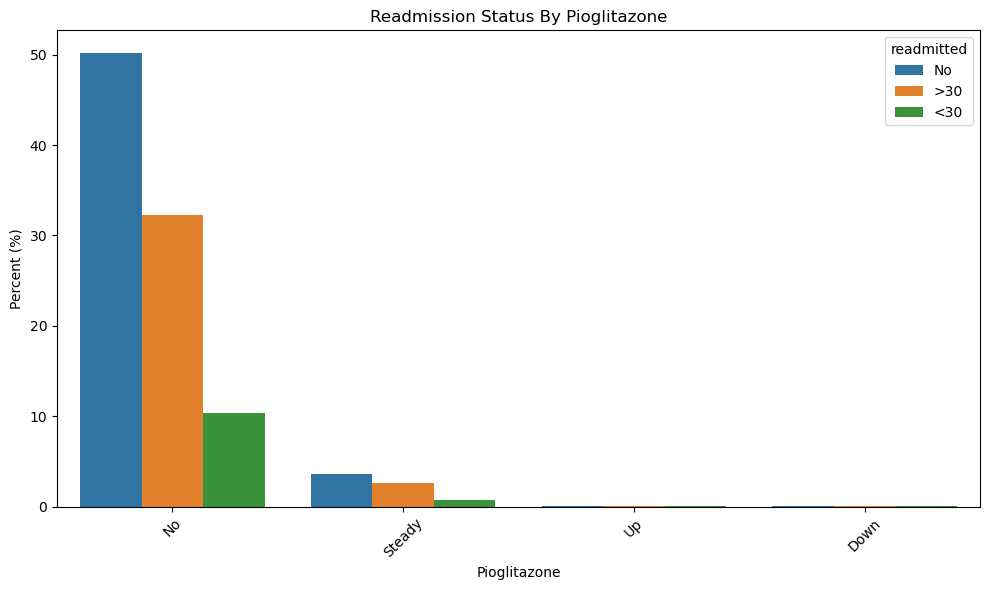

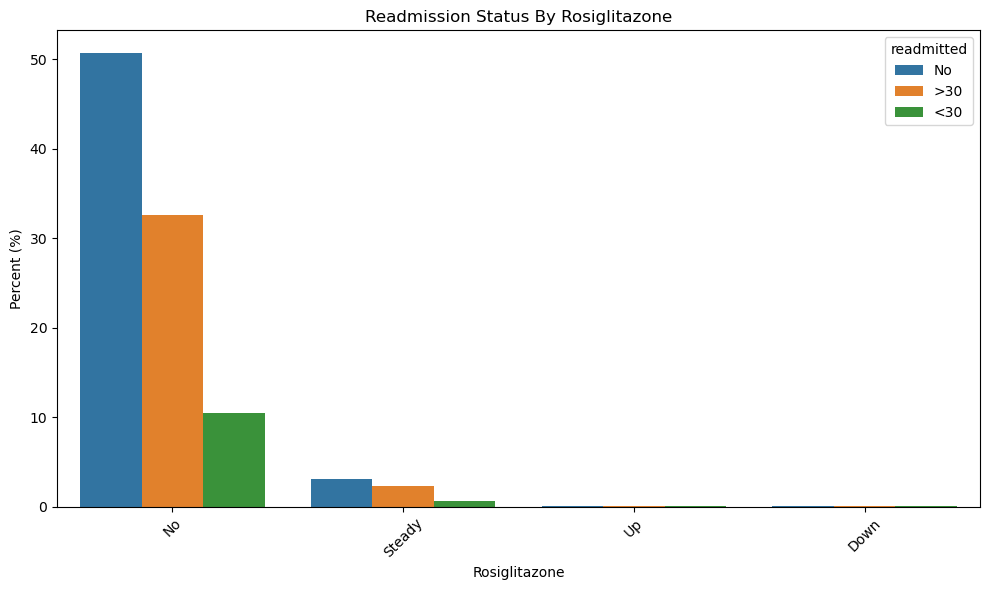

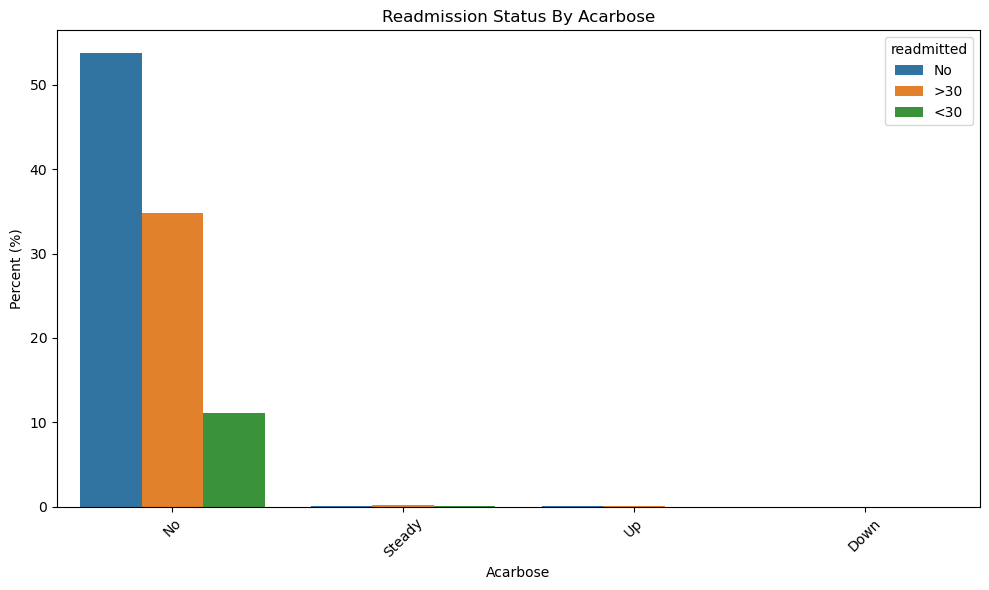

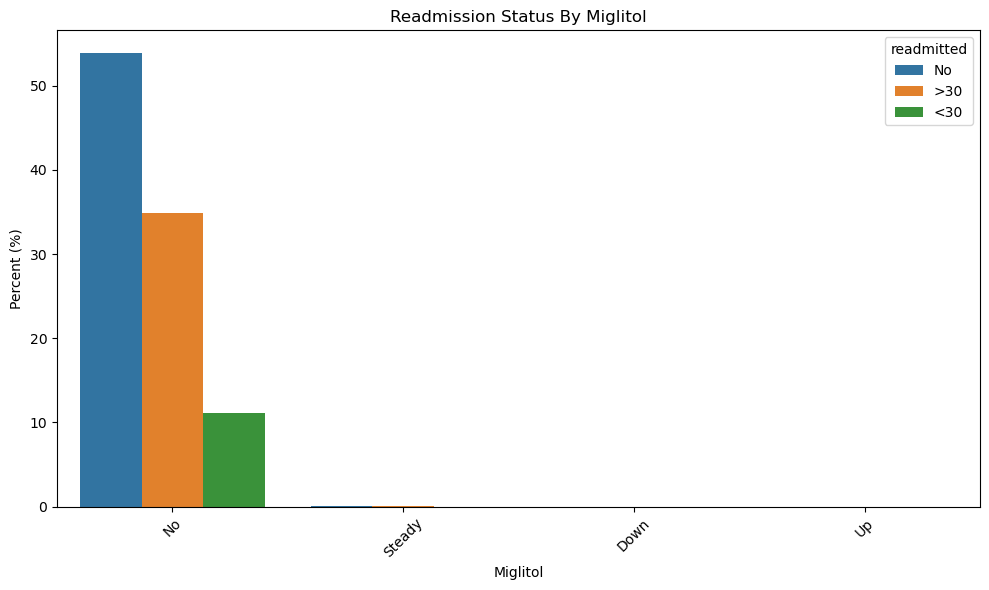

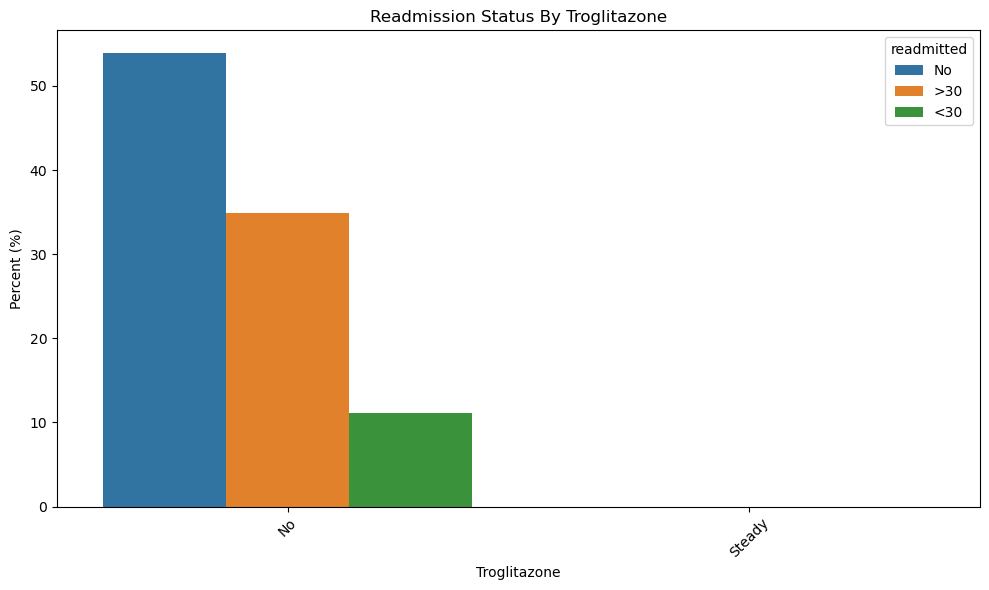

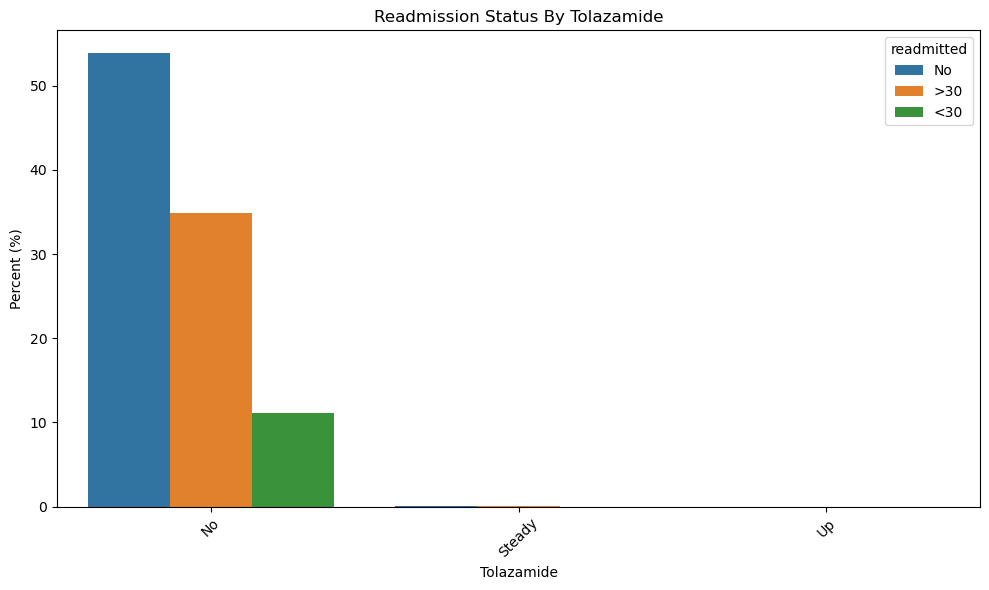

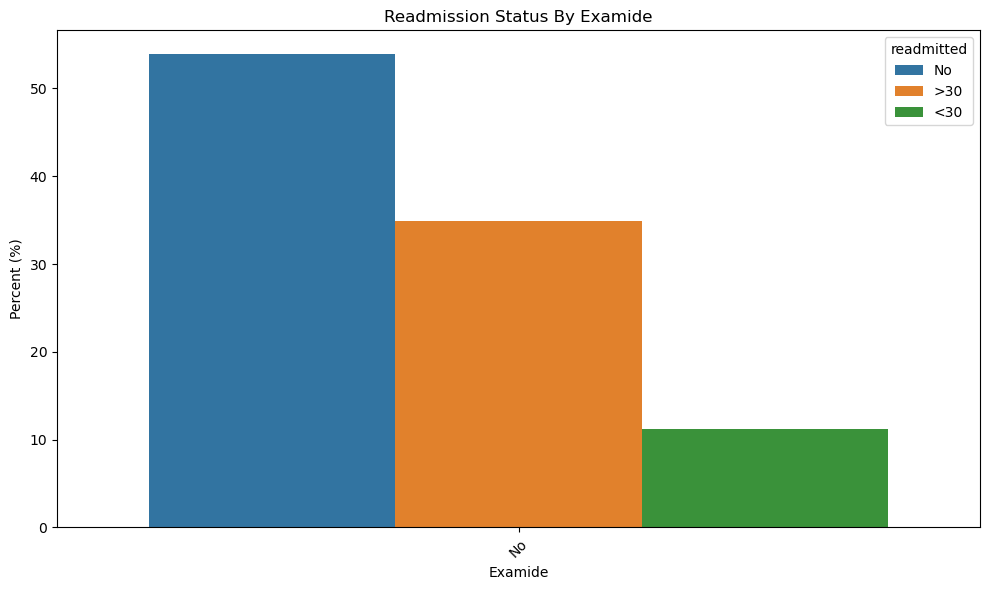

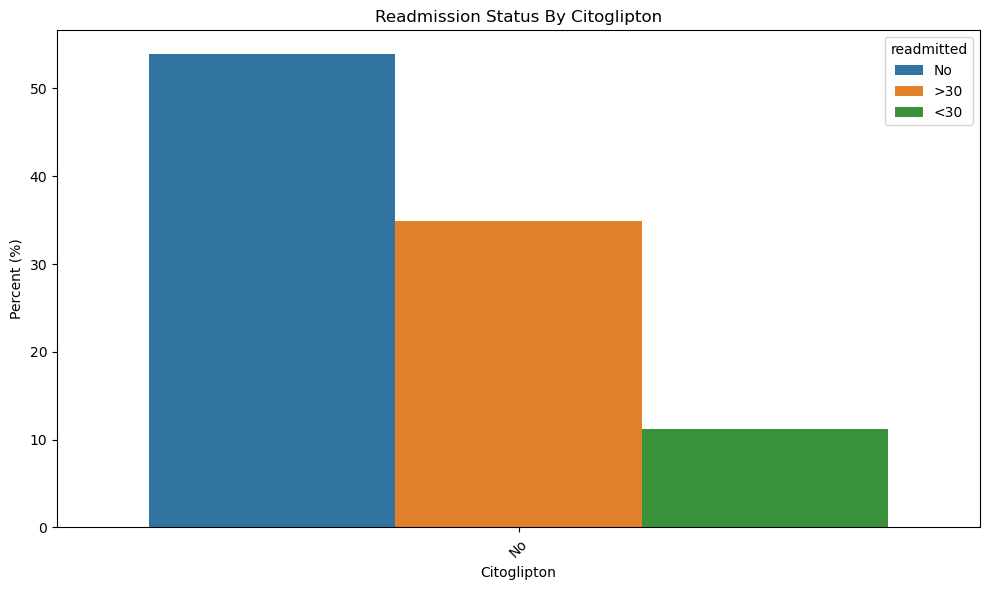

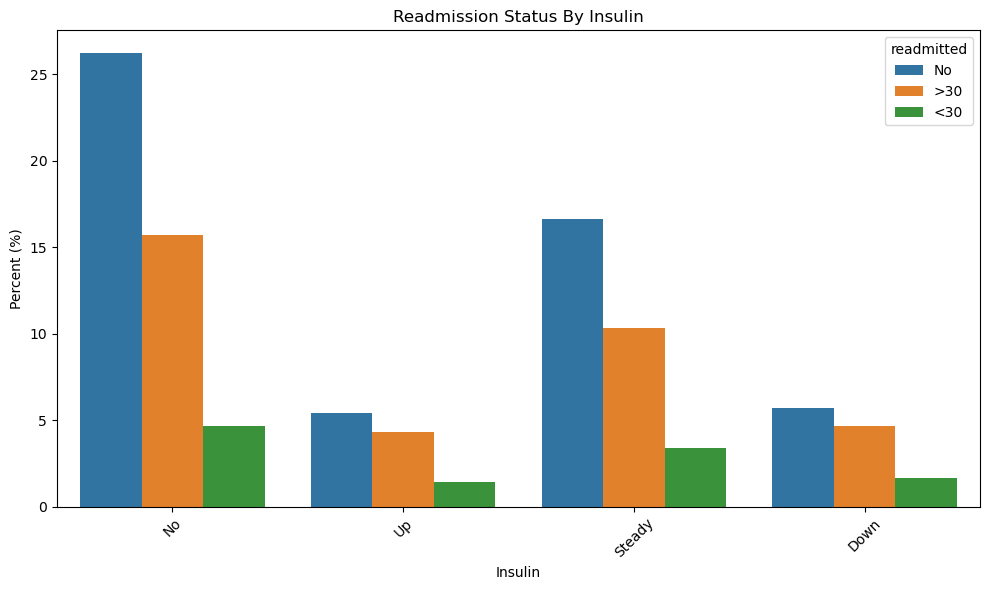

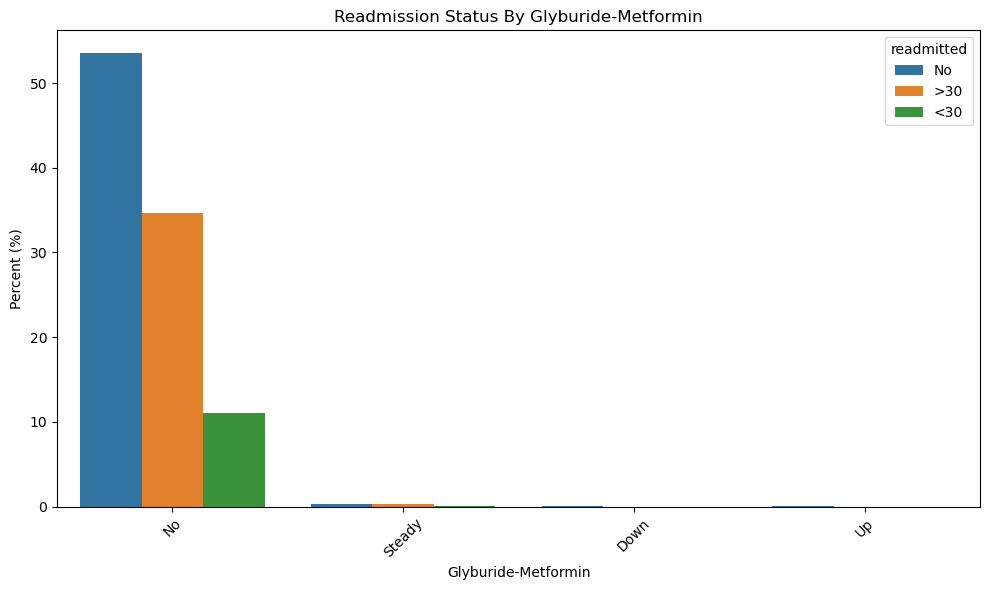

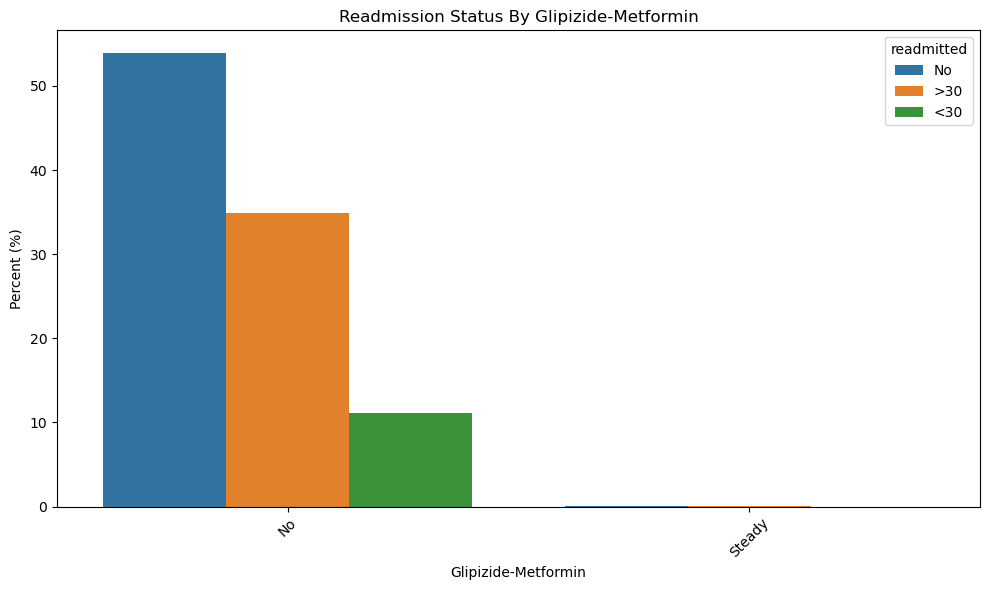

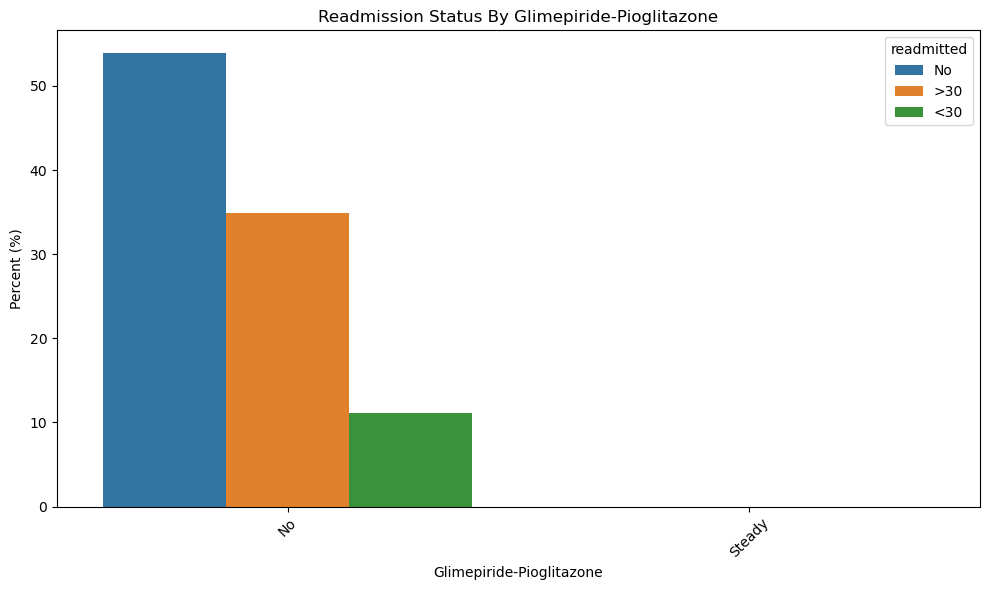

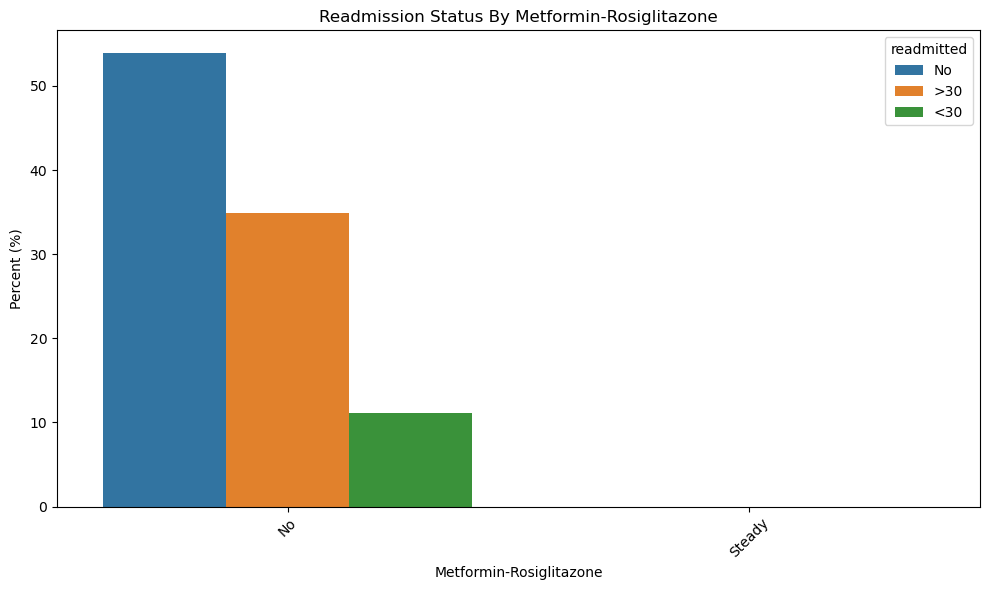

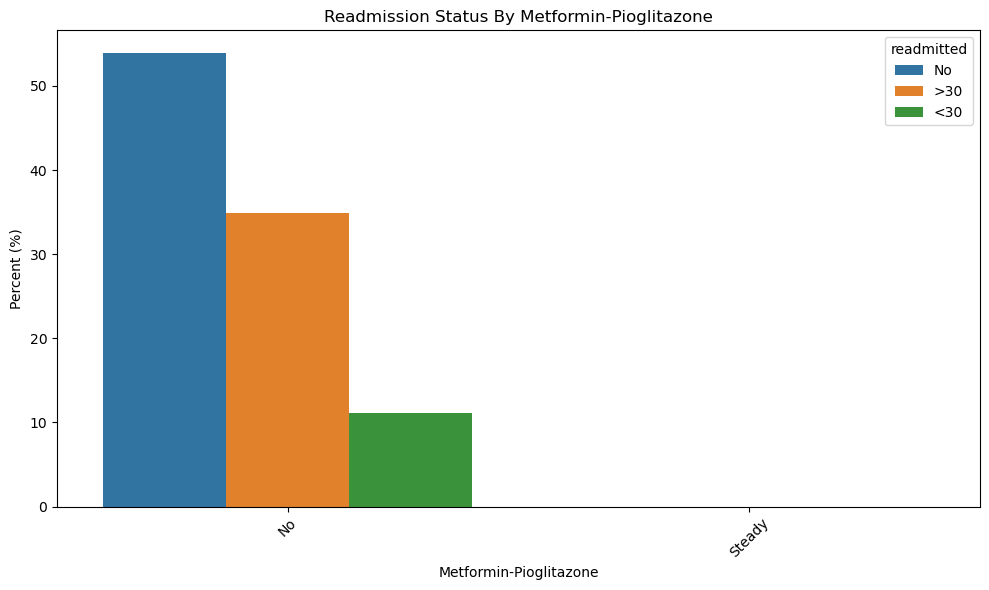

In [16]:
meds_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
            'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
            'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
            'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
meds_labels = ['Metformin', 'Repaglinide', 'Nateglinide', 'Chlorpropamide', 'Glimepiride',
            'Acetohexamide', 'Glipizide', 'Glyburide', 'Tolbutamide', 'Pioglitazone',
            'Rosiglitazone', 'Acarbose', 'Miglitol', 'Troglitazone', 'Tolazamide', 
            'Examide', 'Citoglipton', 'Insulin', 'Glyburide-Metformin', 'Glipizide-Metformin',
            'Glimepiride-Pioglitazone', 'Metformin-Rosiglitazone', 'Metformin-Pioglitazone']

for i in range(len(meds_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=meds_cols[i], hue='readmitted', stat="percent")
    plt.xlabel(meds_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {meds_labels[i]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

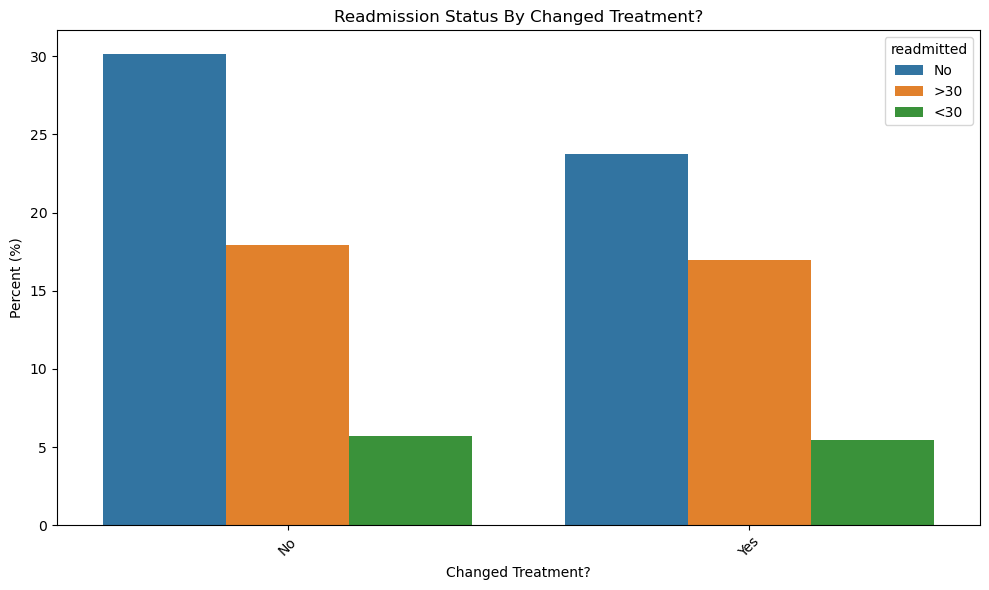

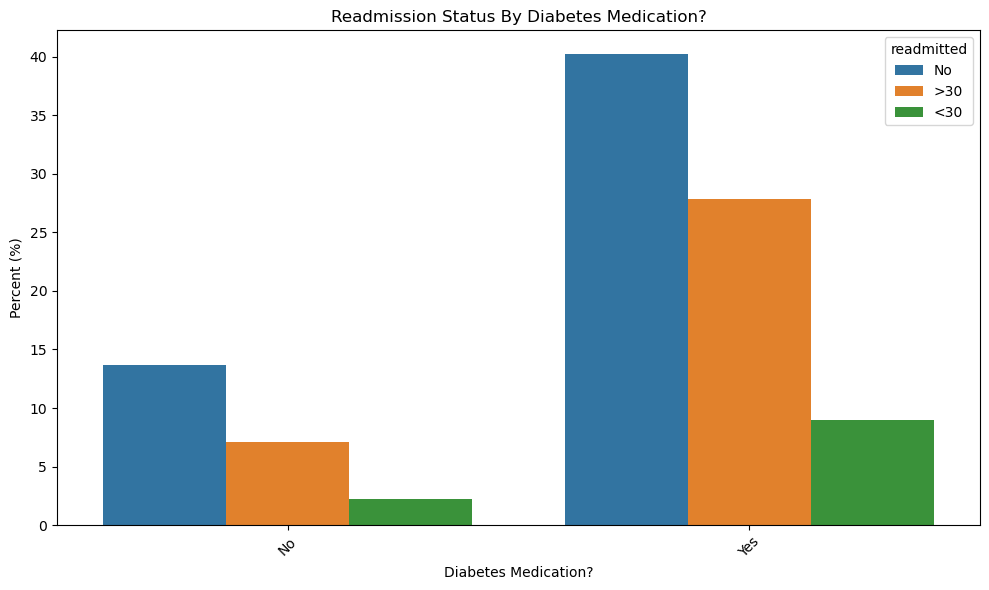

In [17]:
treatment_cols = ['change', 'diabetesMed']
treatment_labels = ['Changed Treatment?', 'Diabetes Medication?']

for i in range(len(treatment_cols)):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=treatment_cols[i], hue='readmitted', stat="percent")
    plt.xlabel(treatment_labels[i])
    plt.ylabel("Percent (%)")
    plt.title(f'Readmission Status By {treatment_labels[i]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Multivariate Analysis

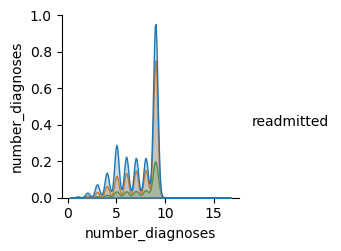

In [18]:
CCI_df = df.iloc[:,[4,21,49]]
# age, number_diagnoses, readmitted
sns.pairplot(CCI_df, hue='readmitted')

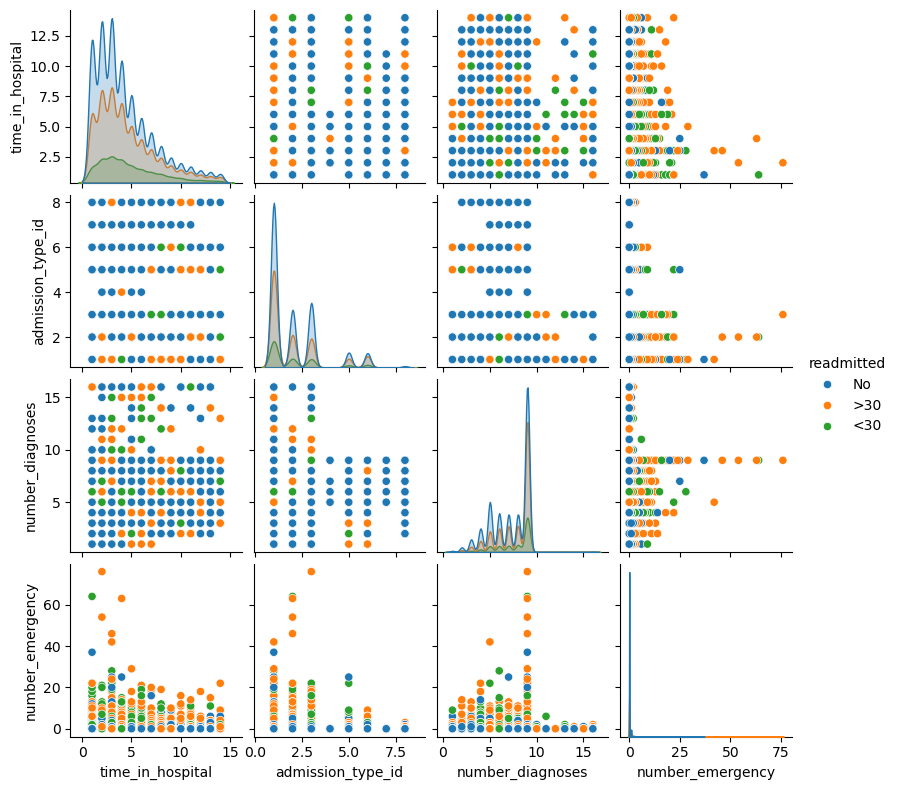

In [19]:
LACE_df = df.iloc[:,[9,6,4,21,16,49]]
# time_in_hospital, admission_type_id, age, number_diagnoses, number_emergency, readmitted
sns.pairplot(LACE_df, hue='readmitted', height=2)

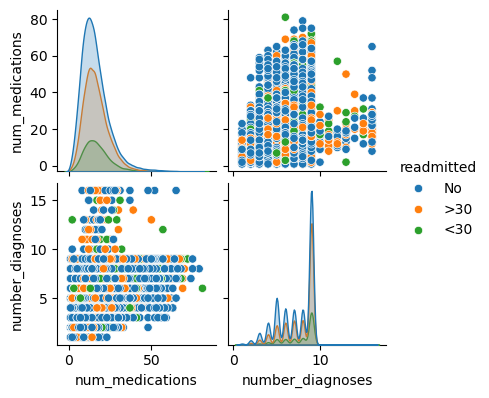

In [20]:
PCi_df = df.iloc[:,[14,4,21,48,49]]
# num_medications, a ge, number_diagnoses, diabetesMed, readmitted
sns.pairplot(PCi_df, hue='readmitted', height=2)

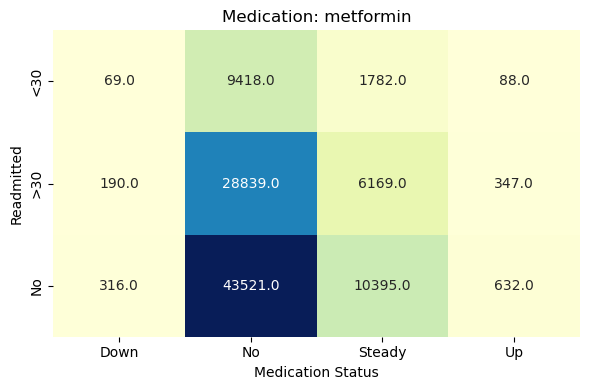

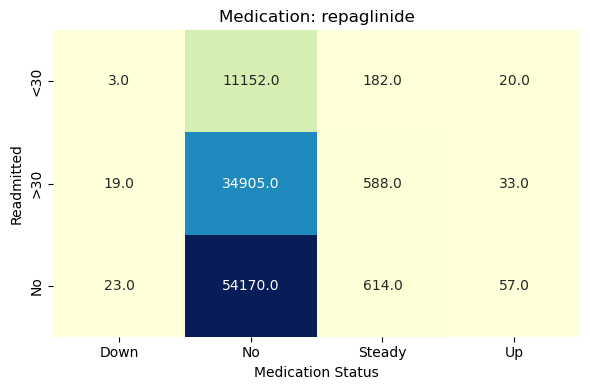

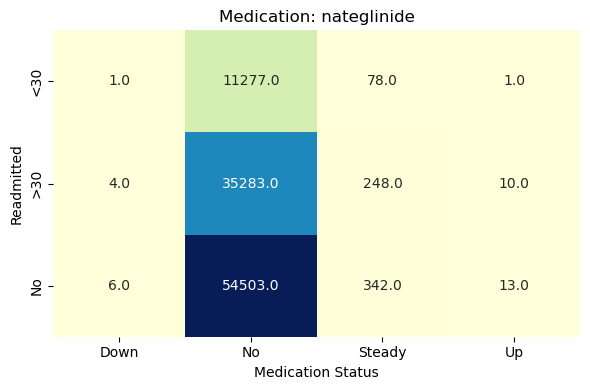

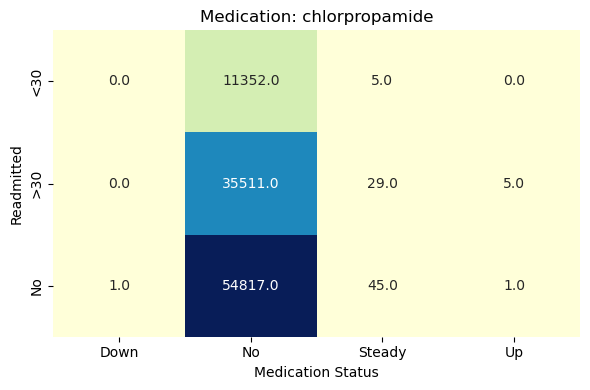

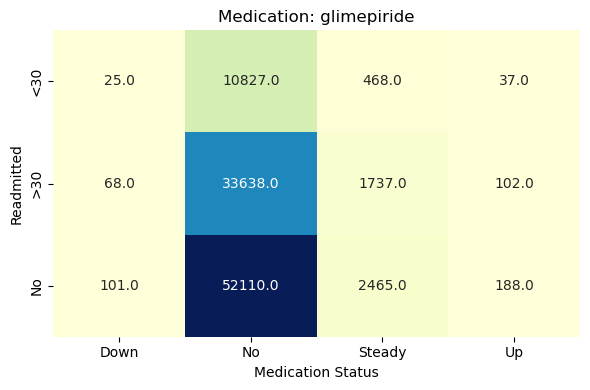

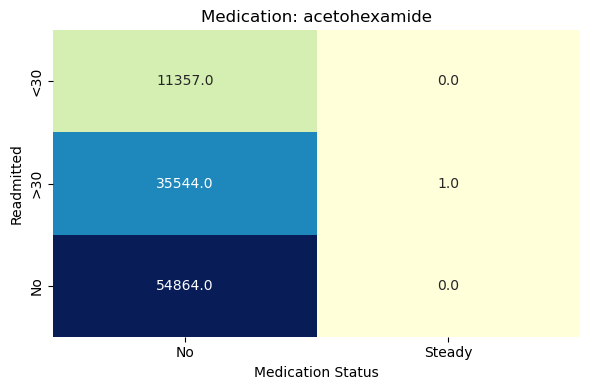

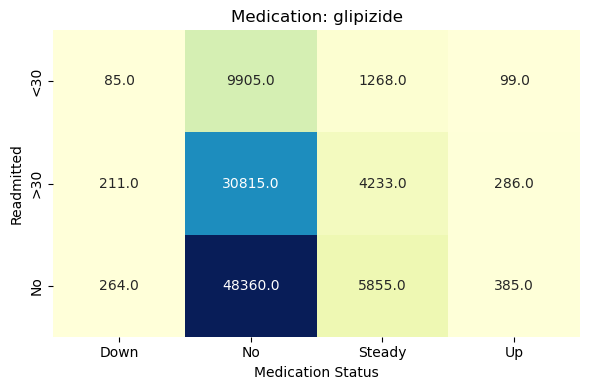

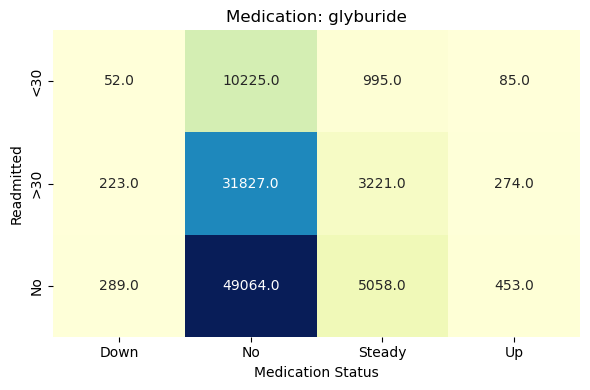

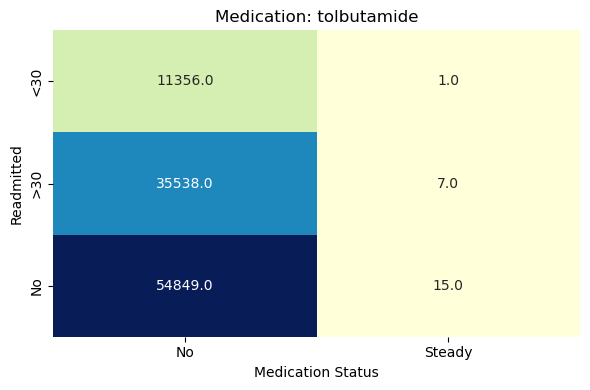

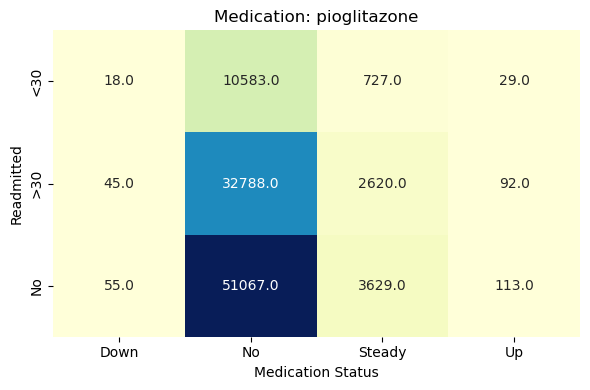

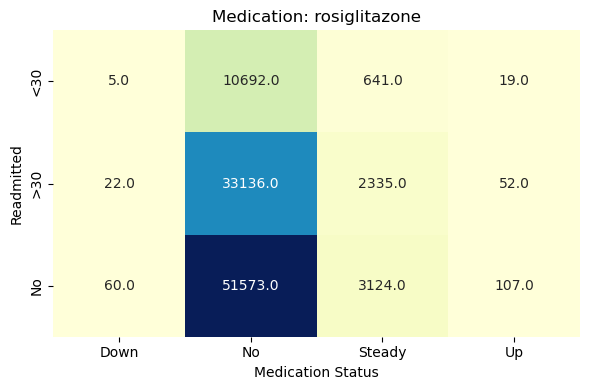

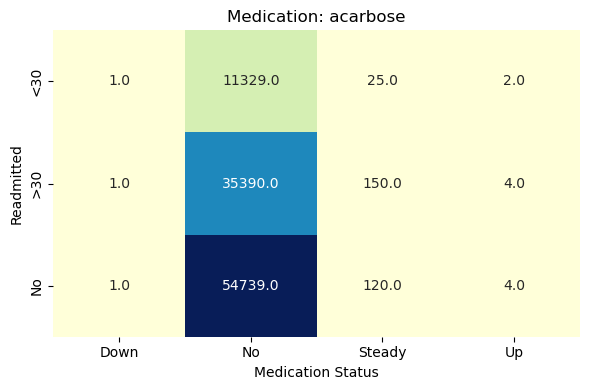

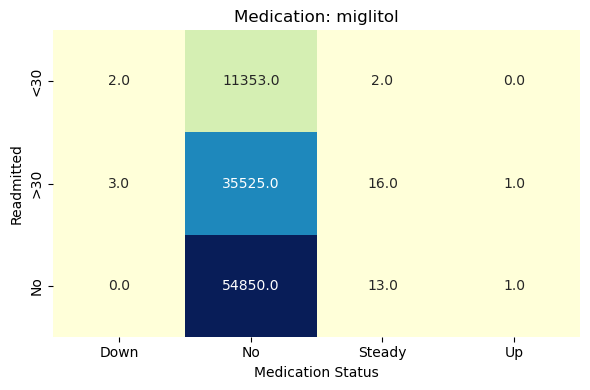

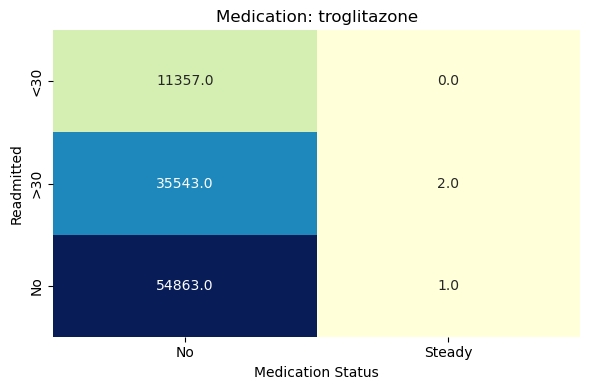

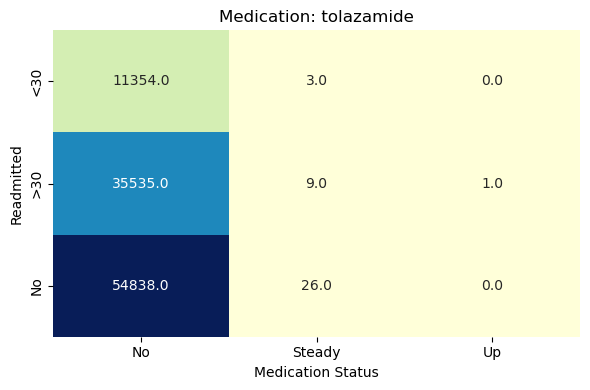

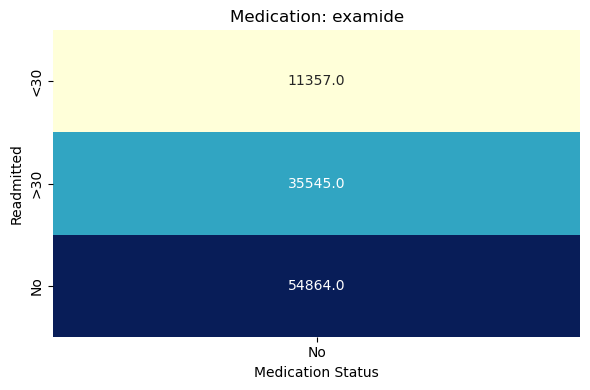

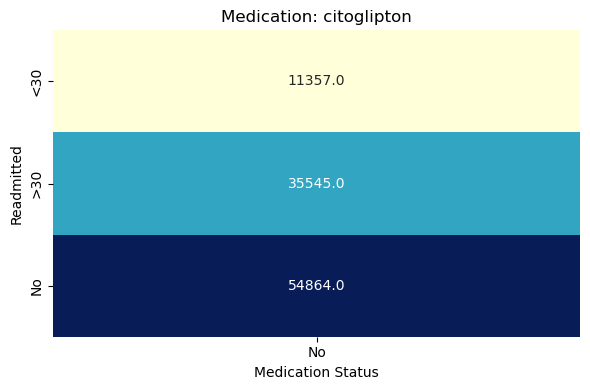

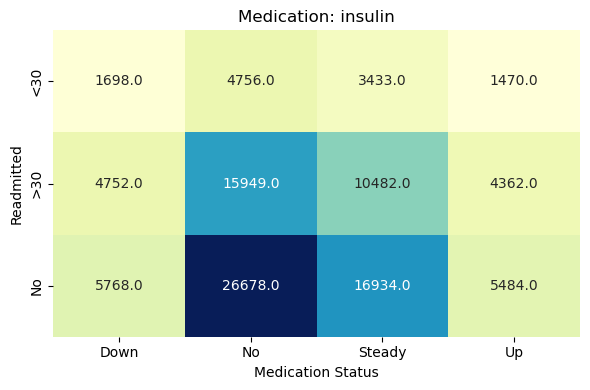

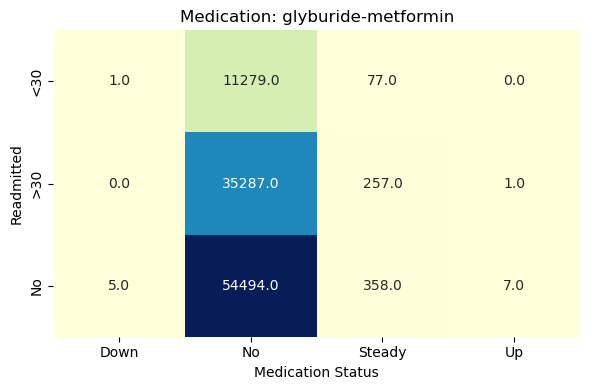

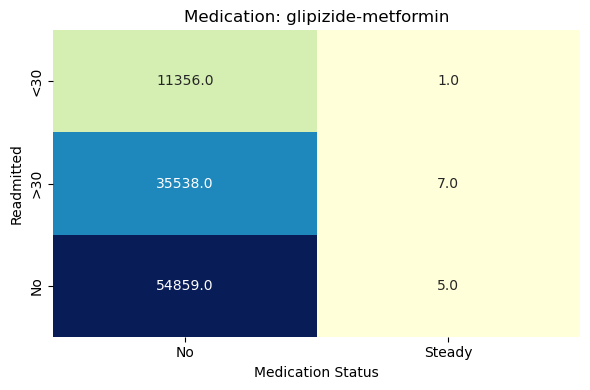

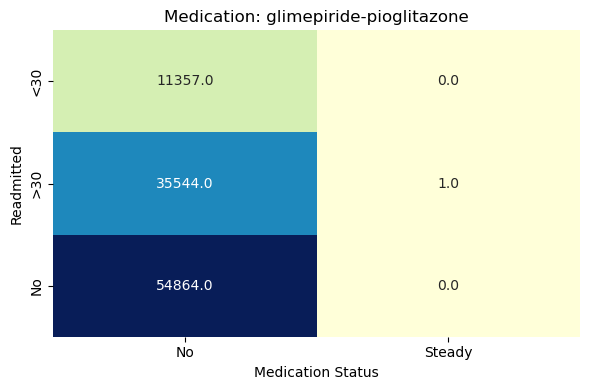

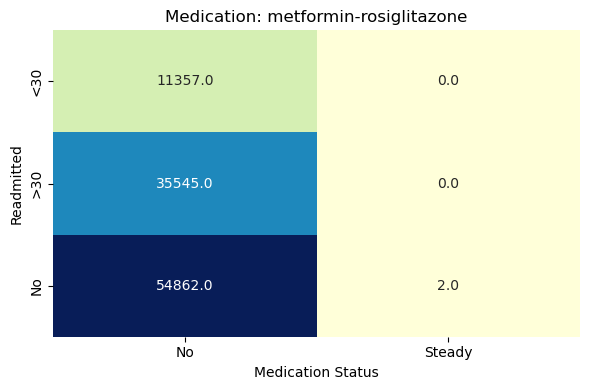

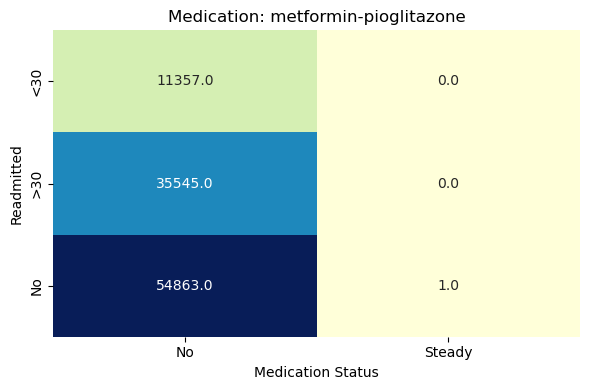

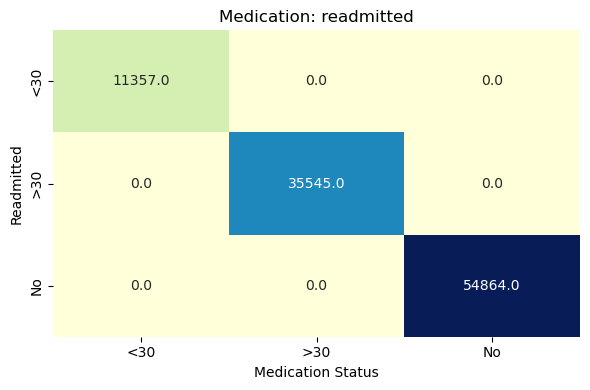

In [21]:
DiabetesMeds_df = df.iloc[:,[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,49]]

for col in DiabetesMeds_df.columns:
    ct = pd.crosstab(
        index=df['readmitted'],        
        columns=DiabetesMeds_df[col]
    )
    
    plt.figure(figsize=(6, 4))
    # ct = ct.div(ct.sum(axis=1), axis=0) * 100
    sns.heatmap(ct, cmap="YlGnBu", annot=True, fmt='.1f', cbar=False)
    plt.title(f"Medication: {col}")
    plt.xlabel("Medication Status")
    plt.ylabel("Readmitted")
    plt.tight_layout()
    plt.show()
    
# sns.heatmap(crosstab, cmap="YlGnBu", annot=True, fmt='d', cbar=False)
# plt.title("Medication Usage Distribution")
# plt.ylabel("Medication")
# plt.xlabel("Status")
# plt.show()

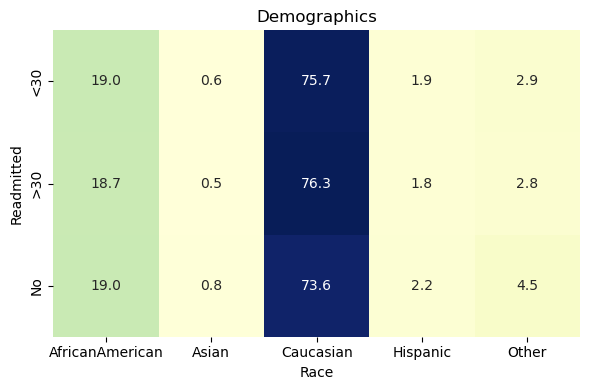

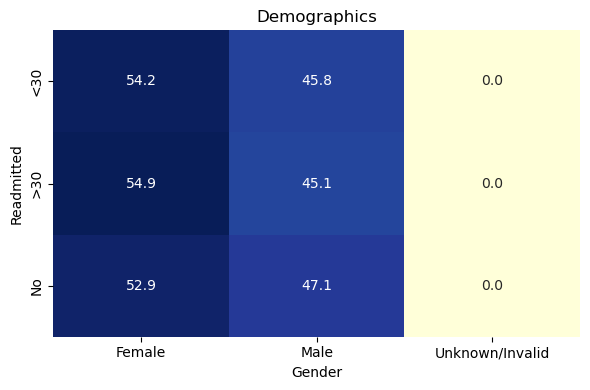

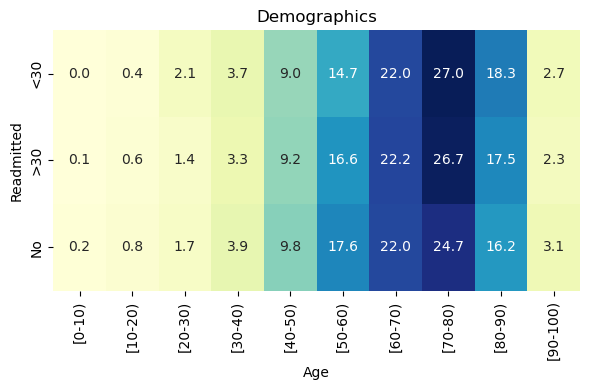

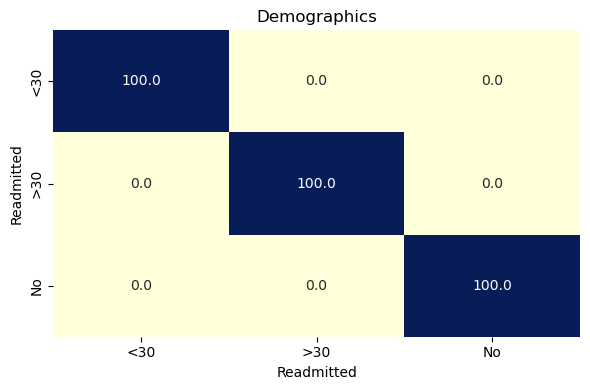

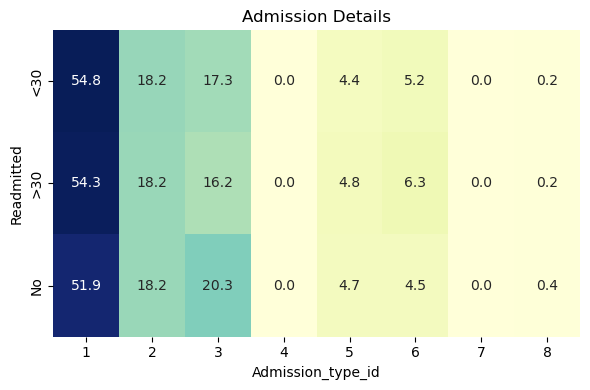

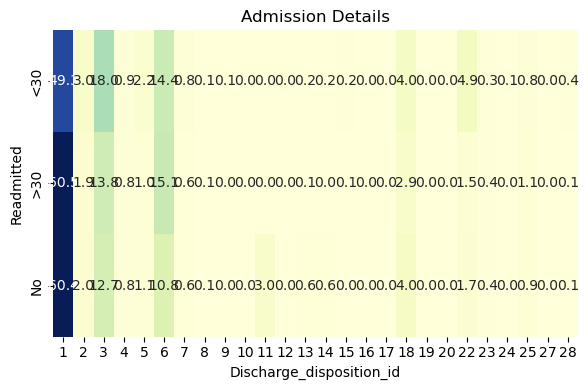

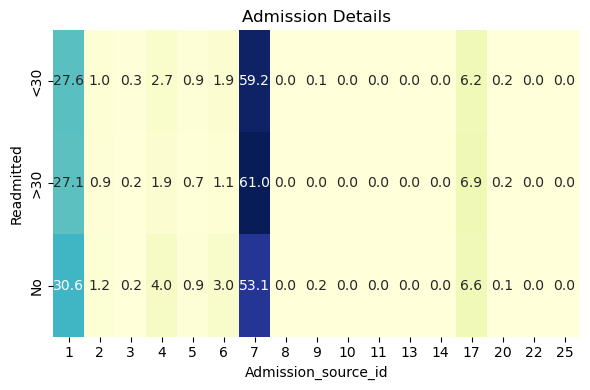

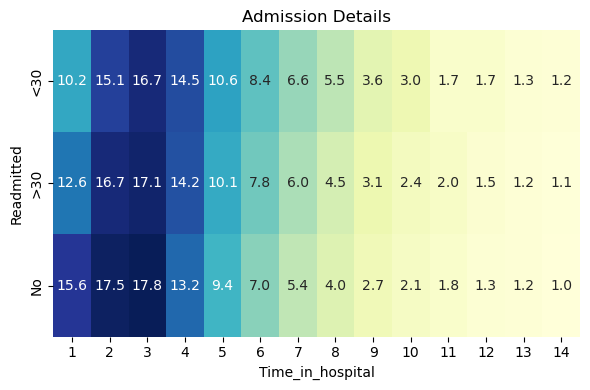

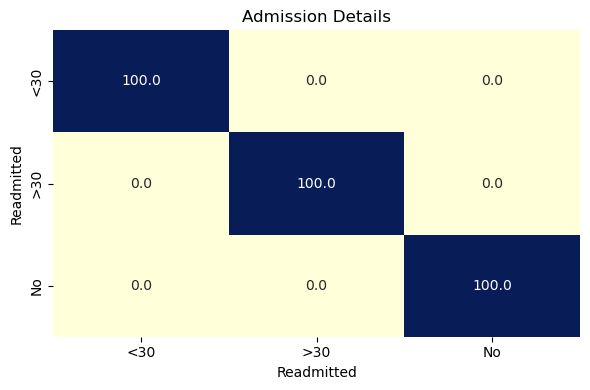

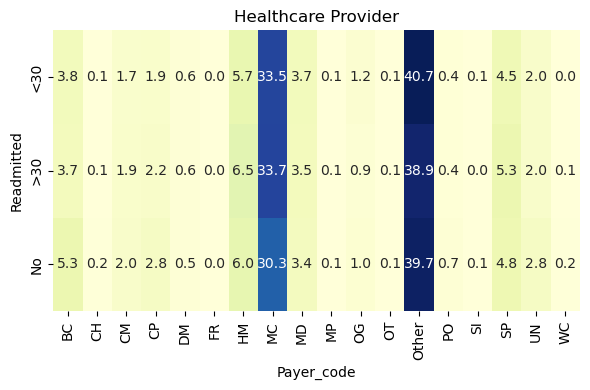

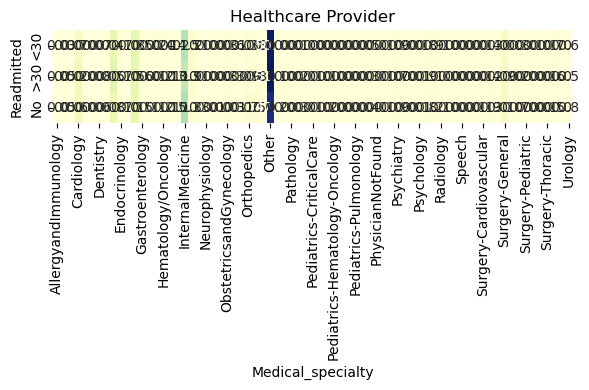

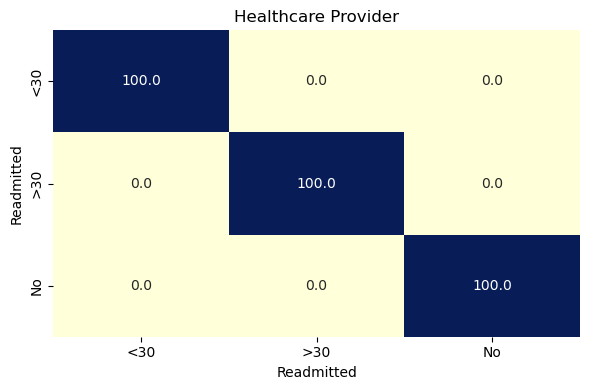

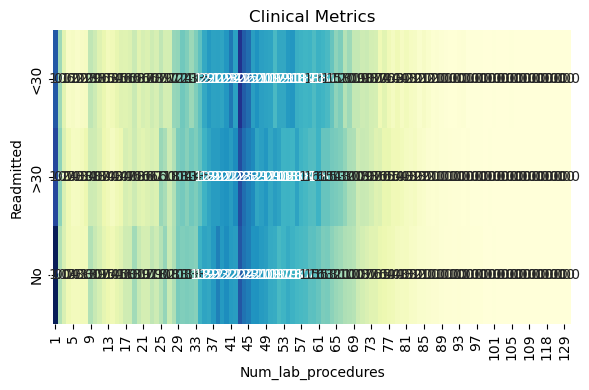

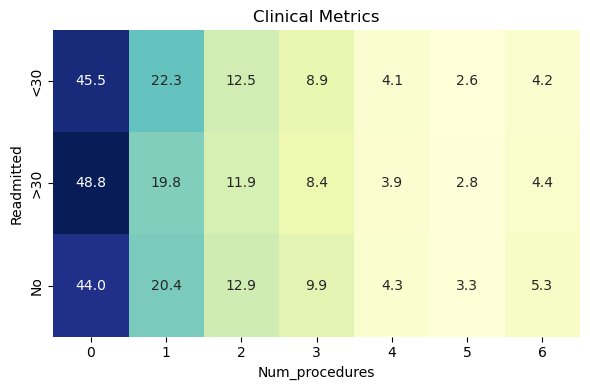

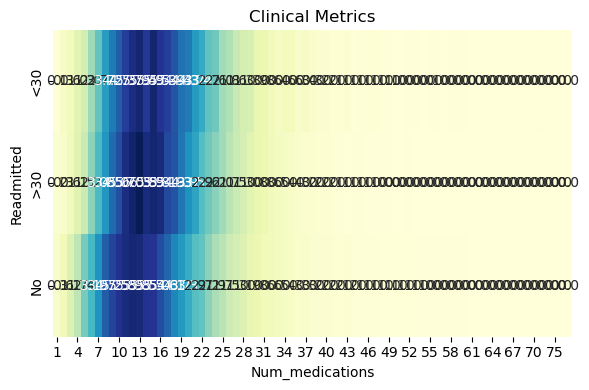

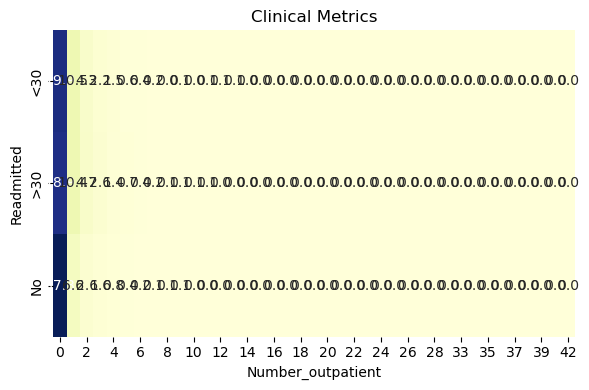

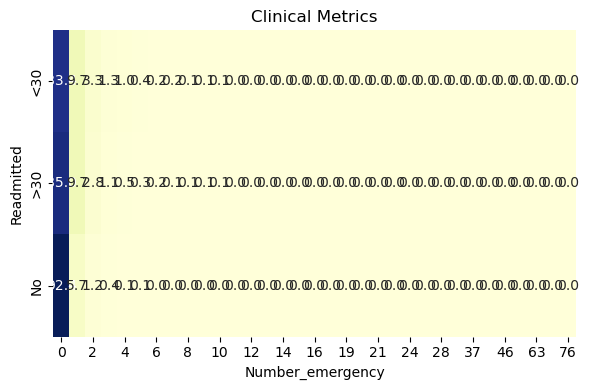

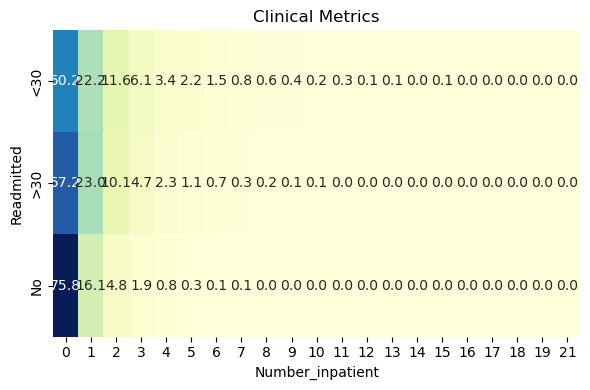

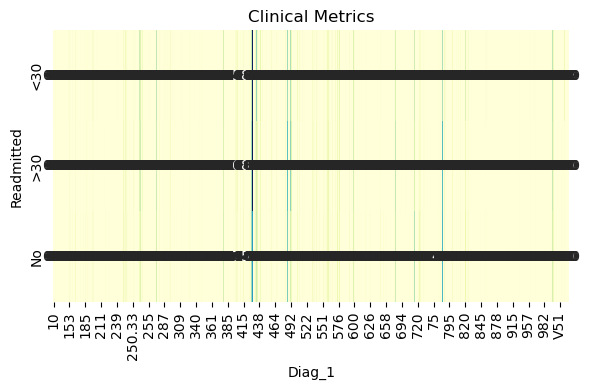

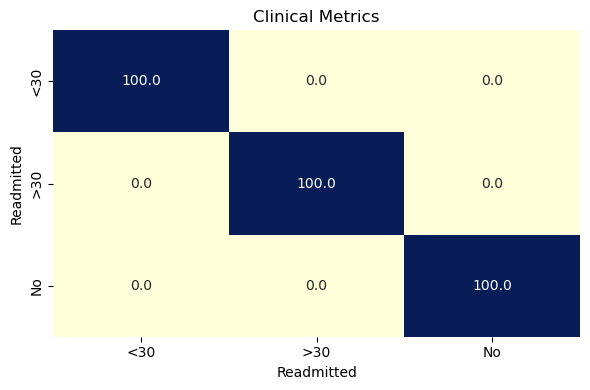

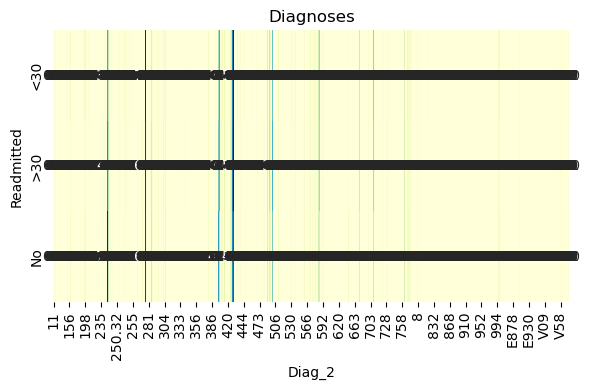

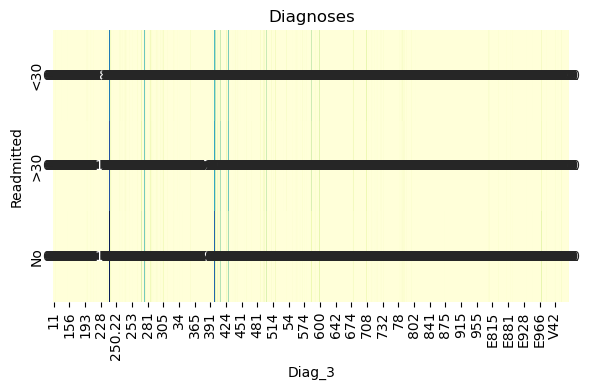

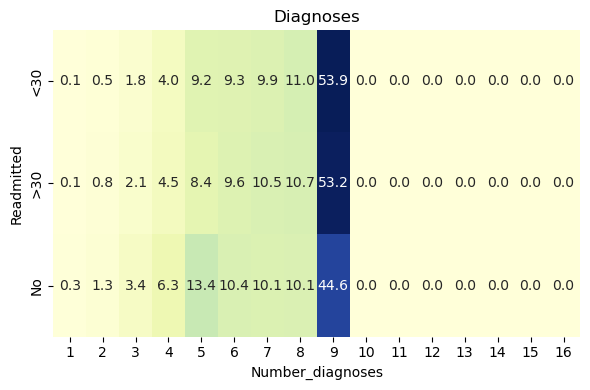

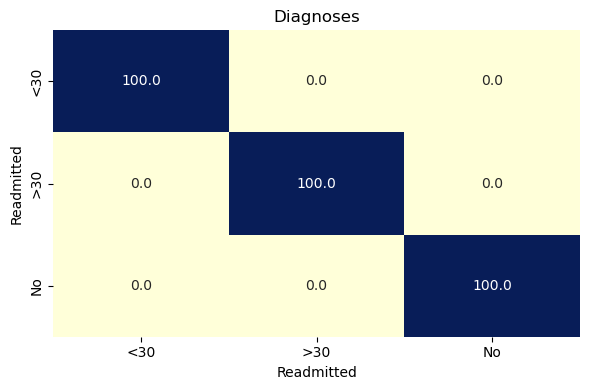

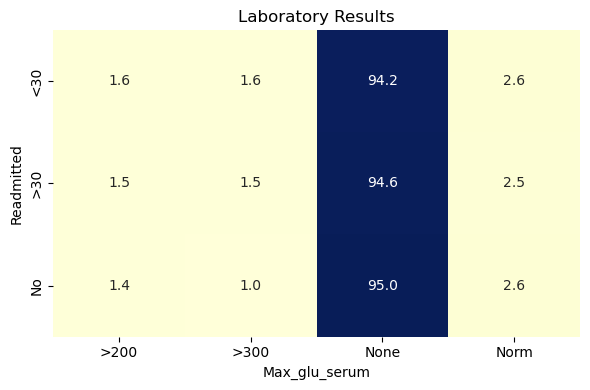

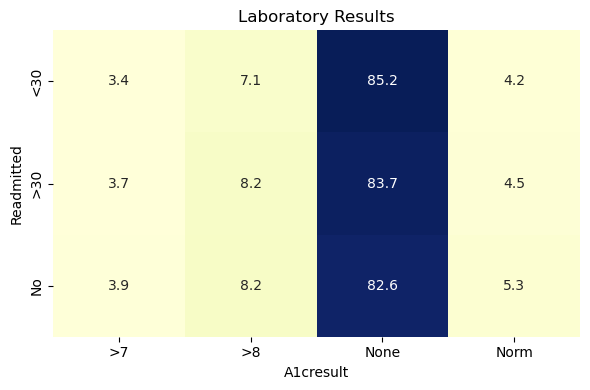

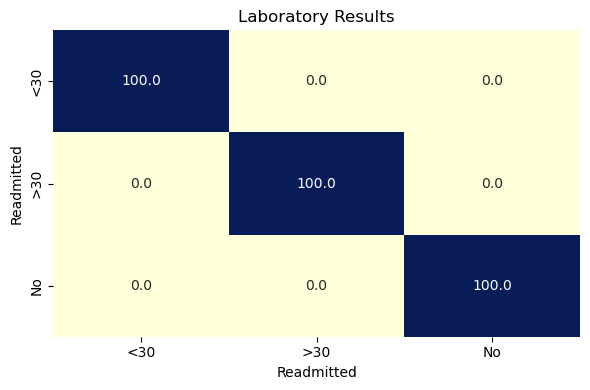

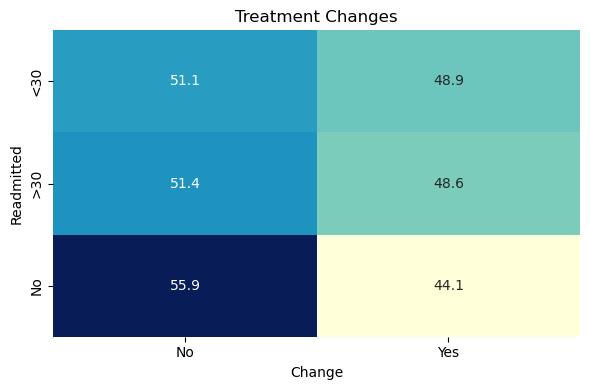

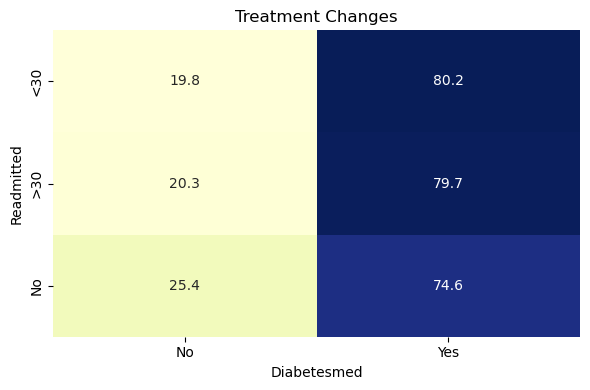

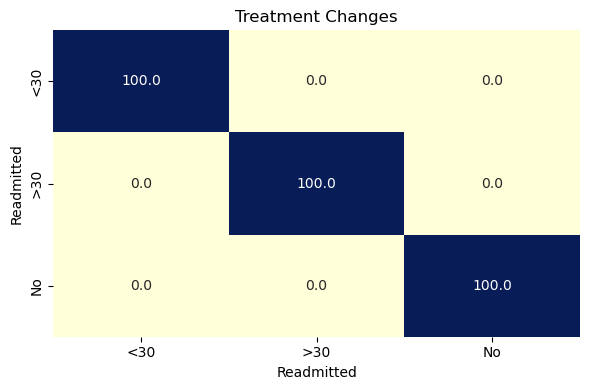

In [35]:
demo_df = df.iloc[:,[2,3,4,49]] # Don't include weight
admission_df = df.iloc[:,[6,7,8,9,49]]
healhprovider_df = df.iloc[:,[10,11,49]]
clinicalmatrics_df = df.iloc[:,[12,13,14,15,16,17,18,49]]
diagnosis_df = df.iloc[:,[19,20,21,49]]
labresults_df = df.iloc[:,[22,23,49]]
treatmentchanges_df = df.iloc[:,[47,48,49]]
i = 0

dataframe_list = [demo_df,admission_df,healhprovider_df,clinicalmatrics_df,diagnosis_df,labresults_df,treatmentchanges_df]
dataframe_names = ["Demographics", "Admission Details", "Healthcare Provider", "Clinical Metrics", "Diagnoses", "Laboratory Results", "Treatment Changes"]
for dataframe in dataframe_list:
    name = dataframe_names[i]
    for col in dataframe.columns:
        ct = pd.crosstab(
            index=df[f'readmitted'],        
            columns=dataframe[col]
        )
        
        plt.figure(figsize=(6, 4))
        ct = ct.div(ct.sum(axis=1), axis=0) * 100
        sns.heatmap(ct, cmap="YlGnBu", annot=True, fmt='.1f', cbar=False)
        plt.title(f"{name}")
        plt.xlabel(f'{col.capitalize()}')
        plt.ylabel(f'Readmitted')
        plt.tight_layout()
        plt.show()
    i += 1

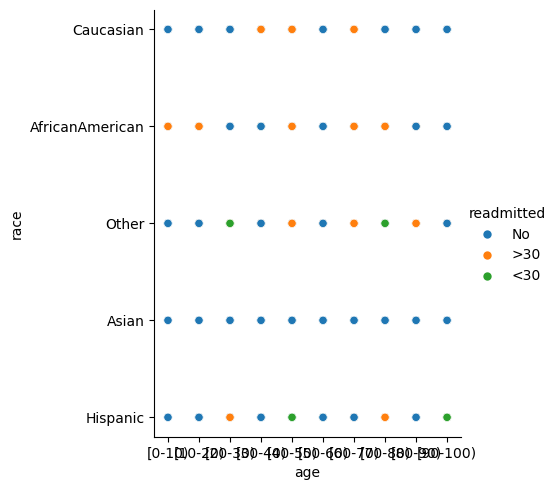

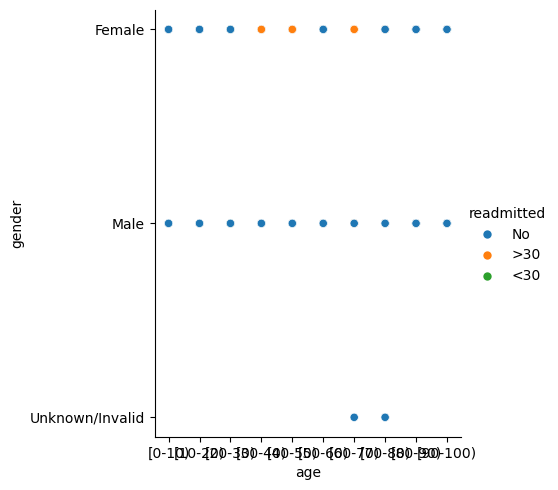

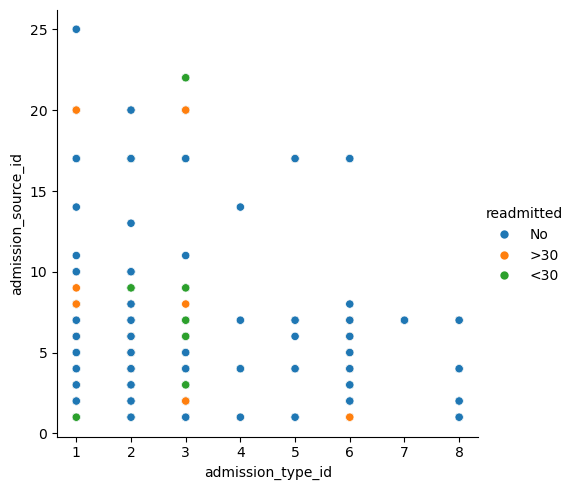

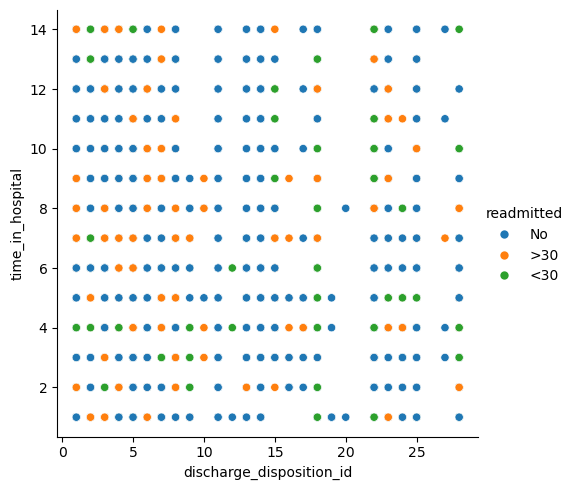

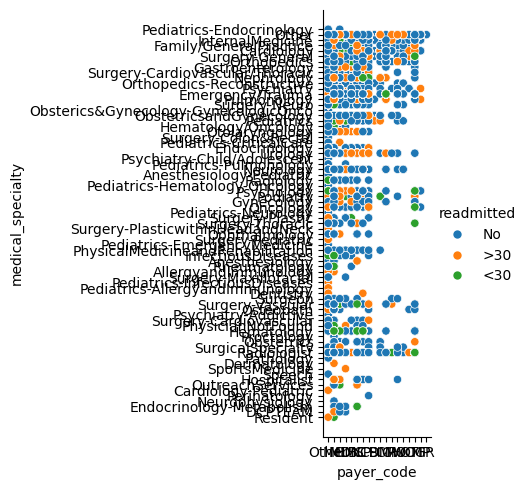

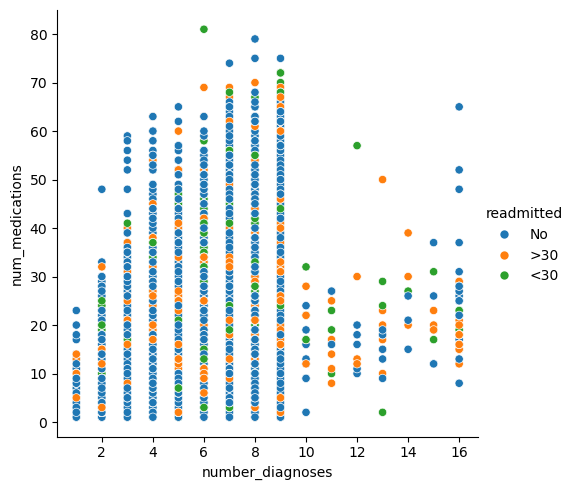

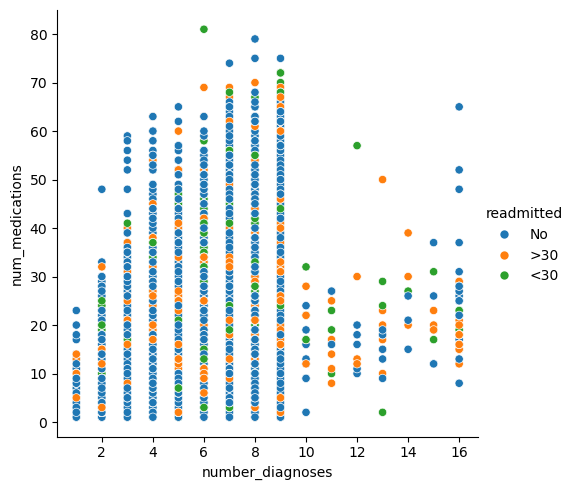

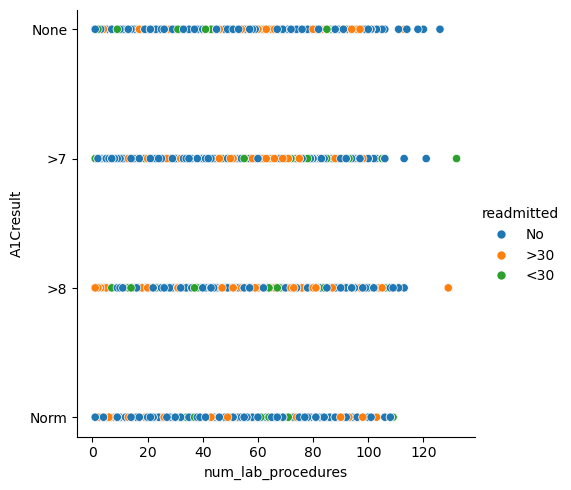

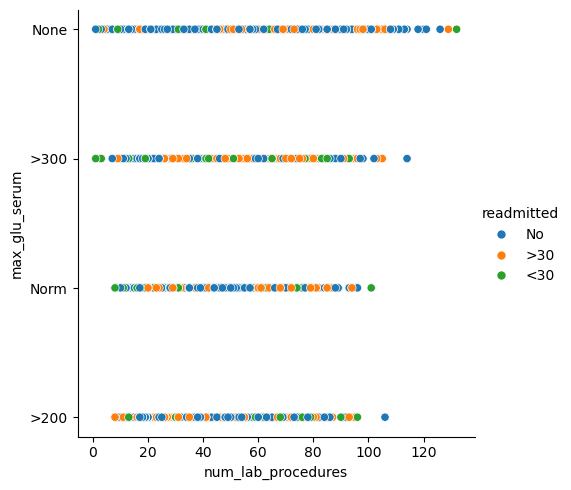

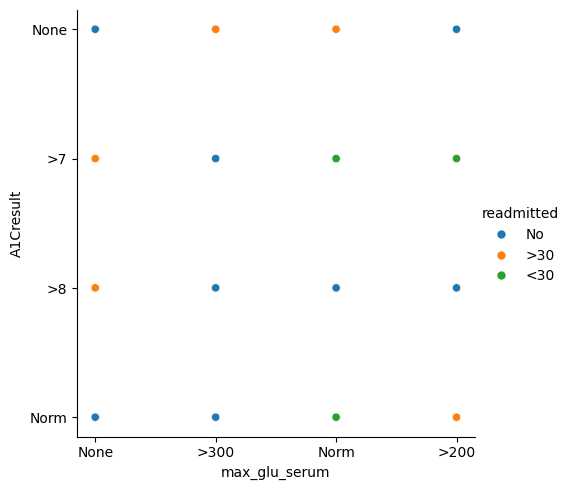

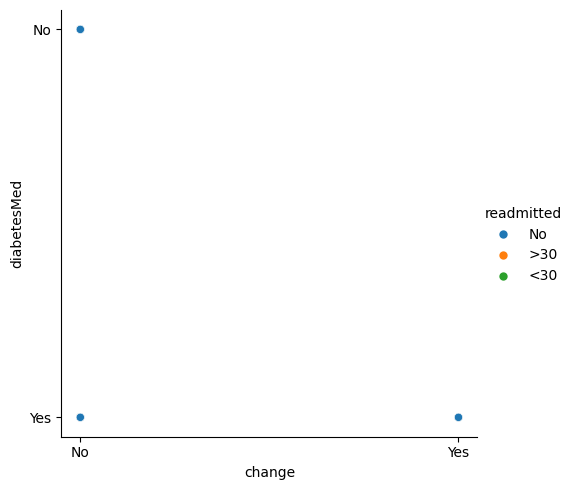

In [34]:
sns.relplot(x='age', y='race', hue='readmitted', data=df)
sns.relplot(x='age', y='gender', hue='readmitted', data=df)
sns.relplot(x='admission_type_id', y='admission_source_id', hue='readmitted', data=df)
sns.relplot(x='discharge_disposition_id', y='time_in_hospital', hue='readmitted', data=df)
sns.relplot(x='payer_code', y='medical_specialty', hue='readmitted', data=df)
sns.relplot(x='number_diagnoses', y='num_medications', hue='readmitted', data=df)
sns.relplot(x='number_diagnoses', y='num_medications', hue='readmitted', data=df)
sns.relplot(x='num_lab_procedures', y='A1Cresult', hue='readmitted', data=df)
sns.relplot(x='num_lab_procedures', y='max_glu_serum', hue='readmitted', data=df)
sns.relplot(x='max_glu_serum', y='A1Cresult', hue='readmitted', data=df)
sns.relplot(x='change', y='diabetesMed', hue='readmitted', data=df)

In [ ]:
# Clearly state the targets and scope of your analysis
# Provide context and heritage data to assist others in apprehending your approach
# Use visualizations and photos to guide your findings and make them more reachable
# Highlight critical insights, patterns, or anomalies discovered for the duration of the EDA manner
# Discuss any barriers or caveats related to your analysis
# Suggest ability next steps or areas for additional investigation

# 0) Data Processing: Replace missing values in dataset
# 1) (DONE) Perform Bivariate Analysis on data types that likely result in hospital readmission
# 2) (DONE) Perform Multivariate Analysis based on data types that make up the LACE and PCi Models (used by other studies)
#    Only performed for numerical variables as pairplot command does not take in categorical variables
# 3) (Done) Perform Bivariate Analysis for all types of diabetes medication against hospital readmission
# 4) (Done) Further correlate specific aspect(s) of dataset with hospital readmission -> 1 level higher than what has been done so far

## Comments
# -Weight is a bad variable in this dataset as there are missing data and some of the data collected does not make sense (0-25)
# -LACE included 4 main variables: Length of Stay, Acuity of Hospital Admission (emergency vs non-emergency),
#  CCI Score and Number of Visits to Emergency Department In the Past 6 Months.
# -PCi included 2 main variables: Polypharmacy (number of concurrent medications) and CCI Score. 
# 1) Plot Correlation Heatmaps for all groups of variables
# 2) Plot Relational Plot of specific variables that are highly correlated with hospital readmission to better understand
#    the effect of these variables on hospital readmission